In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

In [2]:
def SignalFileLoop(fileList):
    for i in range(len(fileList)):
        fileList[i]["signal"] = 1
    print(mass_points[i])
    fileList[i]

In [3]:
def SignalPlotLoop(signalFileList, bkgFileList):
    #overlay signal and background for variables list
    for i in range(len(signalFileList)):
        for var in signalFileList[i].columns:
            print(mass_points[i])
            print(var)
            plt.figure()
            plt.hist(signalFileList[i][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
            plt.hist(bkgFileList[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
            plt.legend(loc='upper right')
            plt.show()

In [4]:
def DefineTrainTest(fileSig, fileBkg, n_sig):
    df_train = pd.concat([fileSig.iloc[:n_sig],fileBkg.iloc[:n_bkg]])
    df_test =  pd.concat([fileSig.iloc[n_sig:],fileBkg.iloc[n_bkg:]])

    #shuffle rows
    df_train = sklearn.utils.shuffle(df_train)
    df_test = sklearn.utils.shuffle(df_test)

    #Reindex [0:n]
    x_train = df_train[variable].reset_index(drop=True)
    y_train = df_train["signal"].reset_index(drop=True)

    x_test = df_test[variable].reset_index(drop=True)
    y_test = df_test["signal"].reset_index(drop=True)
    return df_train, df_test, x_train, y_train, x_test, y_test

In [5]:
def DefineModel(trainFile):
    #Defining sequential or linearly stack layers as model
    #Adding 5 dense layers to network
    model = Sequential()
    model.add(Dense(17, input_dim=trainFile.shape[1], kernel_initializer="random_uniform", activation='tanh'))
    model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))
    return model

In [6]:
def NetworkLoop(xTrainFile, yTrainFile, xTestFile, yTestFile, model, labels, epochs):
    print ('\n', labels, '\n')
    history = model.fit(xTrainFile.values,yTrainFile.values,validation_data=(xTestFile.values,yTestFile.values), epochs=epochs, batch_size=128)
    return history

In [7]:
'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

#sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-allvar-btag.csv"
sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-allvar-btag-extended-dataset.csv"
sig600_file = "/cluster/home/amyrewoldt/21.2.48/sig600-allvar-btag-extended-dataset.csv"
sig700_file = "/cluster/home/amyrewoldt/21.2.48/sig700-allvar-btag-extended-dataset.csv"
sig800_file = "/cluster/home/amyrewoldt/21.2.48/sig800-allvar-btag-extended-dataset.csv"
sig1000_file = "/cluster/home/amyrewoldt/21.2.48/sig1000-allvar-btag-extended-dataset.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/bkg-allvar-btag-extended-dataset.csv"


In [8]:
#variables that are distict when comparing sm to mssm process
#variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","lepton1_pdgId","lepton2_pdgId","lepton3_pdgId"]
#3 leptons or more, first highest pt lepton pt requirement > 30 GeV, 
variable = ["lepton1_pt","lepton2_pt","lepton3_pt","lepton1_eta","lepton2_eta","lepton3_eta","lepton1_phi","lepton2_phi","lepton3_phi","MET","MET_phi","lepton1_flavor", "lepton2_flavor", "lepton3_flavor","lepton1_charge","lepton2_charge","lepton3_charge"]

mass_points = ['500GeV','600GeV','700GeV','800GeV','1000GeV']
#add DR, check lepton pt for bkg

In [9]:
#read signal files
#for sig in sig_file:
    
df_sig500 = pd.read_csv(sig500_file,index_col=0)
df_sig600 = pd.read_csv(sig600_file,index_col=0)
df_sig700 = pd.read_csv(sig700_file,index_col=0)
df_sig800 = pd.read_csv(sig800_file,index_col=0)
df_sig1000 = pd.read_csv(sig1000_file,index_col=0)
df_sig = [df_sig500,df_sig600,df_sig700,df_sig800,df_sig1000]
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [10]:
#tagging signal as 1
SignalFileLoop(df_sig)

1000GeV


In [11]:
sig_file = [sig500_file, sig600_file, sig700_file, sig800_file, sig1000_file]
array_sig = ['df_array500','df_array600','df_array700','df_array800','df_array1000']
def Make2DArray(cvsFile):
    array = np.genfromtxt(cvsFile, delimiter=",")
    return array
for i in range(len(array_sig)):
    array_sig[i] = Make2DArray(sig_file[i])
    print (array_sig[i], len(array_sig[i][:]))

[[           nan            nan            nan ...            nan
             nan            nan]
 [0.00000000e+00 2.77039692e+03 4.51669877e+01 ... 3.62563506e+05
  2.60191983e+03 4.03742078e+00]
 [1.00000000e+00 2.72617874e+03 1.23799963e+03 ... 3.03257944e+05
  2.12196914e+02 1.15567084e-01]
 ...
 [5.59900000e+03 8.12361404e+02 2.56328442e+02 ... 4.10446828e+04
  4.48009513e+00 9.44896316e-03]
 [5.60000000e+03 1.09650016e+04 7.94161155e+02 ... 4.68693827e+05
  2.71088112e+04 4.66940972e+00]
 [5.60100000e+03 1.17107264e+04 2.31853567e+03 ... 2.39922539e+05
  2.75158309e+03 5.26849641e-01]] 5603
[[           nan            nan            nan ...            nan
             nan            nan]
 [0.00000000e+00 6.48527241e+03 3.85569581e+03 ... 2.28365692e+05
  1.31758740e+01 2.63119383e-03]
 [1.00000000e+00 1.25878642e+04 1.17135811e+04 ... 2.67428830e+05
  2.06676766e+04 1.57185800e+00]
 ...
 [5.87300000e+03 9.31481280e+03 3.36868863e+03 ... 2.27197203e+05
  7.63299288e+03 1.34147088

In [12]:
print(mass_points[0])
df_sig[0]

500GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,2770.396925,45.166988,1886.669209,-0.114270,-4.139394,-4.516156,-2.967004,3.001303,-3.119205,282579.719573,...,11,13,-1,1,1,4687.813514,362563.506128,2601.919835,4.037421,1
1,2726.178737,1237.999628,2702.500979,-0.601364,-0.588899,-0.608690,2.643330,2.758222,2.454044,295374.235020,...,11,13,1,-1,1,6620.404008,303257.943685,212.196914,0.115567,1
2,1243.218286,425.821629,948.474241,0.285980,0.284948,0.114781,0.317942,0.321534,0.518543,119954.043558,...,11,11,1,-1,-1,2605.466740,122644.972058,2.934687,0.003738,1
3,93824.660163,3278.837705,7149.346706,-1.066859,-1.344990,0.518562,1.481731,-1.732242,-1.803301,48640.208110,...,11,11,-1,1,1,83487.977574,178086.121325,35396.099195,3.081789,1
4,11453.212968,5979.653674,4777.431085,2.155669,-1.207243,-0.637141,-2.392739,2.890206,-3.092965,174985.393818,...,11,13,1,-1,1,20049.974200,239005.516439,43655.548274,3.508512,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5597,37037.946428,2958.407451,1974.163266,0.717842,0.648976,-3.329501,-1.919723,-1.961675,-1.435193,182407.437871,...,11,11,-1,1,-1,41748.255322,260584.670105,844.237978,0.080638,1
5598,1120.379646,363.563996,126.840401,-1.527255,-1.527495,-1.680763,3.141477,3.137011,-2.764783,243838.554615,...,11,11,-1,1,1,1602.509994,247743.433153,2.957987,0.004472,1
5599,812.361404,256.328442,48.194214,0.624119,0.619371,0.386431,-1.697757,-1.689587,-2.322839,39716.443096,...,11,11,1,-1,1,1108.070310,41044.682819,4.480095,0.009449,1
5600,10965.001562,794.161155,6829.126506,-3.337215,1.100943,1.262512,1.710571,-3.121359,2.614665,320873.789474,...,11,11,1,-1,-1,16475.803406,468693.827101,27108.811157,4.669410,1


In [13]:
print(mass_points[1])
df_sig[1]

600GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,6485.272407,3855.695806,3118.430867,-0.305391,-0.307423,1.415282,0.798468,0.800140,-2.912660,210754.826922,...,11,11,1,-1,-1,7897.286297,228365.691854,13.175874,0.002631,1
1,12587.864163,11713.581110,105.580297,0.229148,-1.252487,0.356706,-2.188626,-1.663749,-2.450692,232699.567929,...,13,11,-1,1,1,23562.416013,267428.830050,20667.676562,1.571858,1
2,5202.116873,4308.017451,3880.449472,-0.661266,0.867554,-0.683179,2.745611,1.798583,2.750549,505424.985289,...,11,13,-1,1,1,12108.934624,522657.765538,9058.326014,1.798375,1
3,98188.540807,4104.967807,3113.268197,-0.180878,-1.674696,-0.239286,1.643858,2.538951,1.891171,258033.556646,...,13,11,-1,1,-1,103850.243804,371230.096442,37171.081145,1.741460,1
4,8388.914067,71.356586,1079.769777,2.842803,0.192805,0.013177,0.983891,1.243587,1.507089,153385.809356,...,11,11,-1,1,-1,9409.751633,215116.951841,2712.640513,2.662693,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,1536.332000,144.005101,60.315675,-1.592833,-1.568167,-1.546331,-0.983791,-0.974451,-1.339611,215570.263802,...,11,11,-1,1,1,1736.979735,219974.542676,12.505367,0.026375,1
5872,11820.482972,318.920452,5786.485736,-0.130268,-0.284000,1.511011,2.306548,2.263087,-0.040880,311866.223313,...,11,11,-1,1,-1,9082.525645,337693.886578,310.499918,0.159758,1
5873,9314.812804,3368.688629,183.033253,0.052005,1.086574,0.672400,0.944196,0.090258,-0.018696,212137.307704,...,13,11,-1,1,-1,11939.578690,227197.203191,7632.992882,1.341471,1
5874,54430.743280,13106.660810,1774.386399,0.912167,0.255740,0.063182,2.863423,-2.312290,-2.456454,104644.997046,...,11,13,-1,1,1,62702.507014,189271.341529,33282.649379,1.287396,1


In [14]:
print(mass_points[2])
df_sig[2]

700GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,75257.848158,56.699886,2139.157701,-0.753414,4.292396,3.829938,-0.504428,0.223211,0.065763,112843.641342,...,11,13,-1,1,1,77110.147255,261625.179712,25624.912882,5.098006,1
1,1296.383471,270.918535,537.686703,2.874417,2.856535,2.697164,-1.294865,-1.332507,-1.003812,107181.328841,...,11,13,-1,1,1,2087.163181,123805.860233,24.788862,0.041673,1
2,32095.458434,7812.173315,12366.381761,-0.321259,-0.333081,-0.348567,-1.857456,-2.012765,-1.666024,153473.058595,...,11,13,-1,1,-1,51966.687957,207875.787873,2463.908156,0.155758,1
3,8519.361745,1194.813600,7617.999517,-1.236859,-1.132148,-1.216012,-2.713750,-2.574138,-2.500287,160393.280692,...,11,11,1,-1,1,17239.794283,190449.785591,556.584098,0.174517,1
4,14174.682177,2995.855087,3863.031440,0.219341,0.186328,-0.928905,0.896081,1.107677,0.499151,95515.482909,...,13,13,-1,1,-1,20684.471920,118735.944428,1420.675273,0.214155,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5832,3735.828570,432.088065,247.412807,0.268703,0.269240,0.250111,1.777785,1.780456,1.606045,55949.686073,...,11,13,1,-1,-1,4411.879894,60533.420376,3.833009,0.002724,1
5833,23325.194036,3958.551096,3884.103515,0.466918,0.547019,-3.901906,3.120680,3.135755,0.724408,149063.149644,...,11,13,-1,1,-1,24564.273655,263068.728189,783.393385,0.081507,1
5834,10212.761944,366.838184,2174.792575,-0.664242,-0.955838,5.027422,1.445116,1.566705,0.234912,278733.348874,...,11,13,1,-1,1,11517.515785,429513.077625,613.293170,0.315931,1
5835,9949.264878,7704.705030,4773.822806,-2.366561,0.451342,-0.837857,-0.724031,-0.212609,2.343984,27577.056283,...,13,11,-1,1,1,12600.446259,79897.756428,33975.461123,2.863936,1


In [15]:
print(mass_points[3])
df_sig[3]

800GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,194774.232977,4309.421008,17952.488516,-0.731431,-1.020376,-0.962480,-1.997793,-2.207397,-2.094248,179939.812439,...,13,13,1,-1,1,216874.270382,426099.786987,10379.822508,0.356964,1
1,17392.917636,1148.622894,9244.745147,-0.220408,-0.353304,-1.528206,-3.098399,3.077661,1.406364,112431.033313,...,11,11,1,-1,1,18989.557191,151802.644182,763.133075,0.170696,1
2,30522.390804,4510.084175,18561.069911,-1.374111,-1.360616,3.095259,-2.385983,-2.442836,-1.396934,337899.388931,...,11,11,-1,1,1,47726.718207,600805.259720,685.452503,0.058433,1
3,143078.289113,17979.932049,27551.535091,1.317603,1.549260,-0.657353,-0.147359,-0.126509,0.307119,20974.353241,...,13,11,-1,1,-1,186227.053444,275803.785286,11827.585426,0.232593,1
4,9755.368163,3639.078692,633.684300,-1.761422,-1.767628,0.794343,-0.071622,-0.063305,-1.909863,413071.068512,...,11,13,1,-1,-1,13239.608555,452581.263487,62.095622,0.010378,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5944,13182.975583,1154.516816,291.313071,1.635169,1.529186,1.981018,0.415614,0.377292,0.445010,65567.794543,...,11,11,1,-1,1,14627.875445,98100.452798,439.747694,0.112699,1
5945,1220.759730,153.282772,102.477582,-1.173622,-1.072975,-1.024149,0.510836,0.453901,0.492354,68705.766845,...,11,11,1,-1,1,1476.292387,71248.547673,50.058161,0.115635,1
5946,7272.506836,2284.965574,1020.108860,-3.586228,-3.031832,-3.692956,3.119891,2.818285,1.422168,105775.558308,...,11,11,-1,1,-1,9477.218365,220127.116921,2596.182014,0.631127,1
5947,8539.730058,1278.983462,1667.792103,1.268960,1.317854,-1.105711,0.019814,-0.006187,2.485043,182177.954346,...,13,13,-1,1,1,8577.404848,203448.308754,359.167959,0.055378,1


In [16]:
print(mass_points[4])
df_sig[4]

1000GeV


,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,13878.053709,6248.952348,10369.872717,-0.869305,-0.869276,-0.837310,-2.911794,-2.911697,-3.033836,172334.238525,...,11,13,1,-1,1,30445.908234,212741.793229,5.024003,0.000102,1
1,16340.585127,509.431960,11440.852069,2.380093,-0.992649,-0.963826,0.154626,-1.251304,-1.358084,77195.899595,...,11,13,-1,1,-1,20837.370807,168628.811236,15500.948603,3.654044,1
2,9065.490844,6543.479877,79.312176,-0.570692,-0.885992,1.404691,-1.921752,-1.849311,0.468427,169535.211343,...,13,11,-1,1,1,15542.815967,189200.650709,2510.430361,0.323515,1
3,22132.746151,2157.376751,5999.267197,1.757277,1.825298,-0.746868,-1.441711,-1.343783,-1.479010,229019.589480,...,13,13,1,-1,1,30274.884007,303043.302394,899.595741,0.119234,1
4,2387.941884,590.526706,1862.781744,2.166805,2.173131,0.476228,0.638736,0.954791,-2.519639,152994.595052,...,13,13,-1,1,-1,1107.726768,167701.972672,457.947061,0.316118,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6183,300.431171,12.024212,151.326087,4.743060,3.767535,3.891930,2.859373,-3.049808,-2.896350,151771.454724,...,11,11,1,-1,1,449.658797,171680.076051,65.048861,1.044763,1
6184,836.260046,468.091505,561.750692,-3.159413,-3.162096,-2.942569,3.056572,3.059517,2.777756,73482.486571,...,11,13,1,-1,-1,1850.760191,91937.403015,2.734122,0.003984,1
6185,42454.765969,12826.361508,565.655215,-0.586094,-0.616311,1.263892,-1.540856,-1.496094,2.349077,21608.684857,...,13,11,-1,1,-1,54854.082651,81226.413590,1284.631889,0.054006,1
6186,22089.550998,18055.572378,252.042593,1.734049,1.787907,1.792406,2.103980,2.180541,2.222777,442107.713687,...,11,11,-1,1,1,40367.161831,551235.530351,1869.264329,0.093606,1


In [17]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,1433.540521,1428.251099,773.170492,1.383949,-0.834655,-0.833446,2.697600,2.366755,2.365518,49308.475937,...,11,11,-1,1,-1,3587.445068,55357.862098,3895.530835,2.243137,0
1,17335.331964,15230.525699,10931.750114,-0.585225,-0.653844,-0.060488,2.439753,2.419471,1.200302,143914.757214,...,11,13,1,-1,1,37655.259742,192599.006066,1162.851869,0.071554,0
2,14254.047396,1364.183916,4099.499668,0.812616,1.178619,0.997478,3.130746,-1.198331,-1.434342,40343.360784,...,11,13,-1,1,-1,14178.230244,65404.552027,7487.929473,1.988089,0
3,8000.201489,1030.694047,187.711162,-1.460241,3.800097,3.460135,1.117693,1.182282,1.204038,73078.427522,...,13,11,1,-1,-1,9216.129366,116873.305653,39639.923981,5.260734,0
4,7865.593031,296.296542,3834.079109,1.389073,0.110968,0.122820,-2.694789,0.951421,0.941153,101079.219419,...,11,11,-1,1,-1,4664.086677,121032.645663,3618.790621,2.930390,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,126561.741315,642.182162,916.530177,0.895058,-1.397822,0.902197,-2.846423,0.119497,-2.856350,51397.912231,...,11,11,-1,1,-1,126845.969782,196386.272976,31195.550598,3.748864,0
5610,36042.884731,8764.140390,5541.348432,1.210849,1.048953,0.494528,-1.705026,-1.704388,2.269444,39166.535007,...,11,13,1,-1,1,41282.613380,104626.892328,2880.632789,0.161897,0
5611,7442.559784,1350.704520,6733.544423,1.732064,1.725209,1.442430,3.111347,0.565337,3.137672,65851.501043,...,13,11,1,-1,-1,13068.527770,99678.400985,6069.247226,2.546019,0
5612,51448.649448,105.273454,28299.548391,-0.083772,0.049906,0.345898,-1.643386,-1.931935,-0.207850,61243.067061,...,11,13,1,-1,-1,62048.248216,142874.715755,738.265810,0.318010,0


500GeV
lepton1_pt


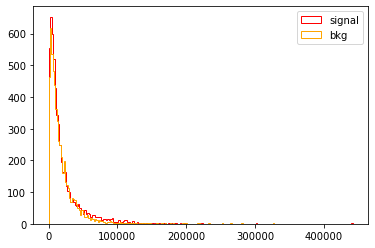

500GeV
lepton2_pt


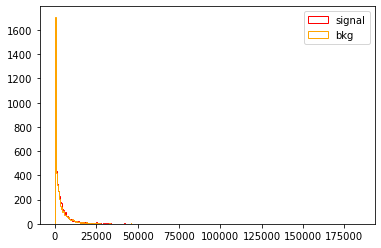

500GeV
lepton3_pt


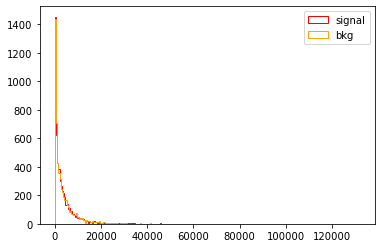

500GeV
lepton1_eta


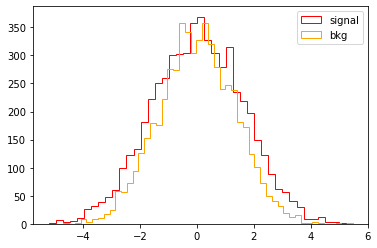

500GeV
lepton2_eta


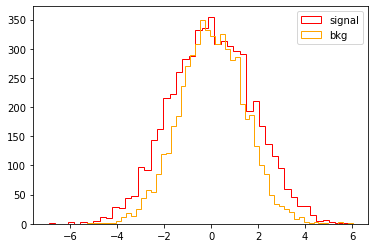

500GeV
lepton3_eta


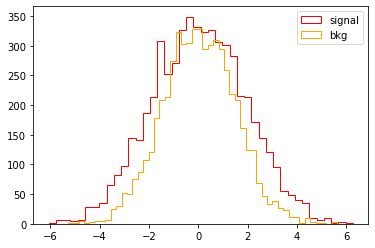

500GeV
lepton1_phi


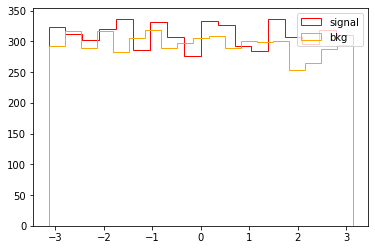

500GeV
lepton2_phi


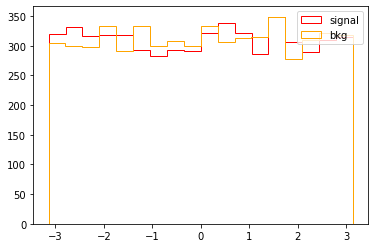

500GeV
lepton3_phi


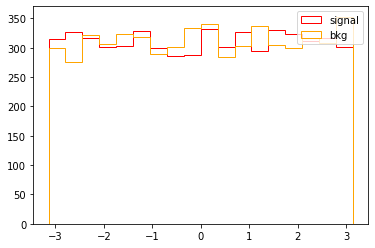

500GeV
MET


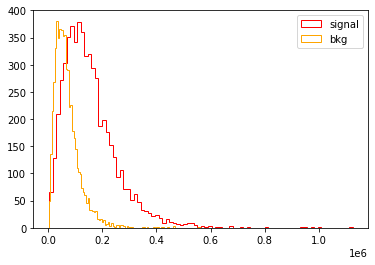

500GeV
MET_phi


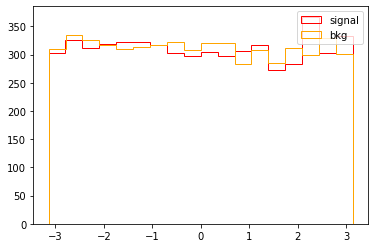

500GeV
lepton1_flavor


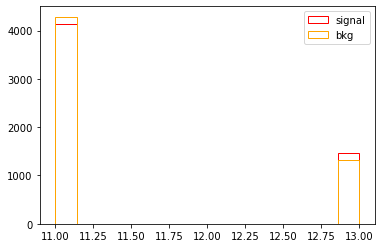

500GeV
lepton2_flavor


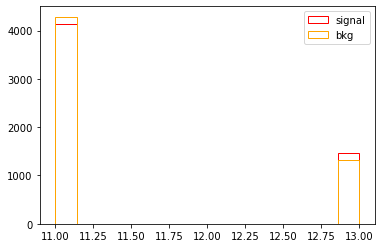

500GeV
lepton3_flavor


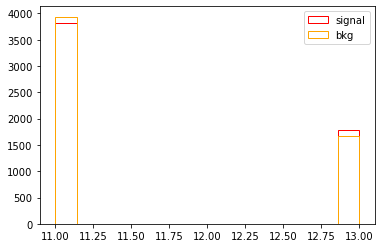

500GeV
lepton1_charge


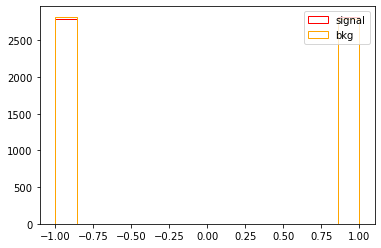

500GeV
lepton2_charge


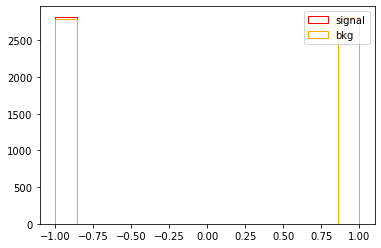

500GeV
lepton3_charge


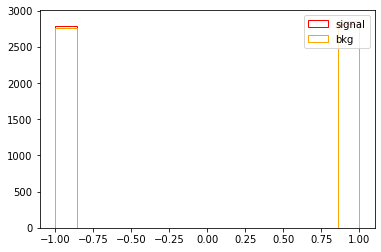

500GeV
visible_pt


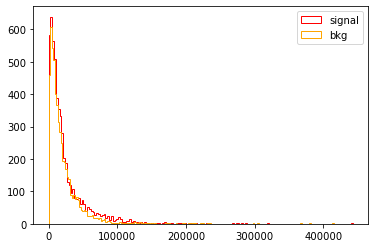

500GeV
transverse_mass


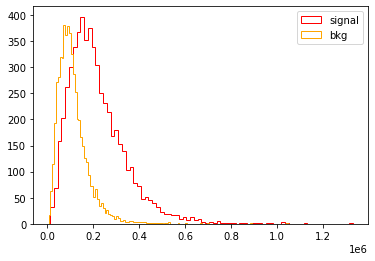

500GeV
dilep_mass


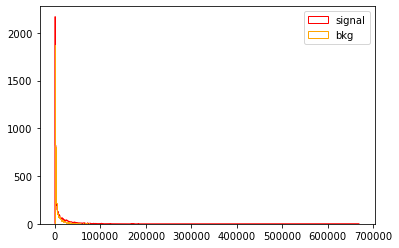

500GeV
dilep_DR


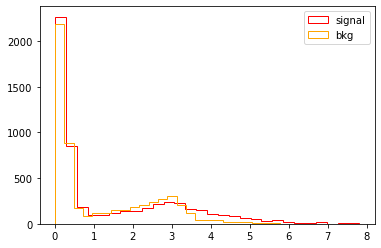

500GeV
signal


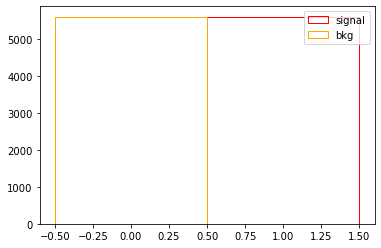

600GeV
lepton1_pt


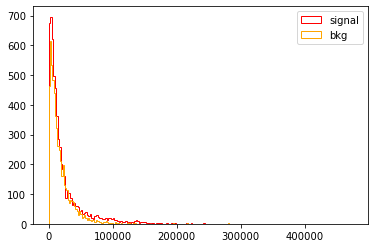

600GeV
lepton2_pt


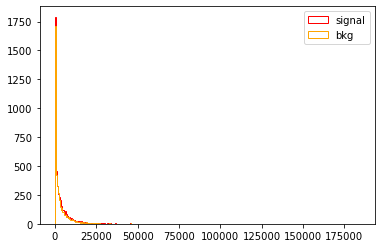

600GeV
lepton3_pt


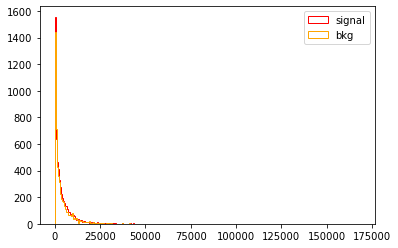

600GeV
lepton1_eta


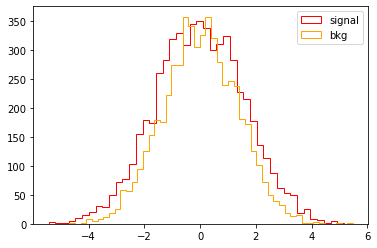

600GeV
lepton2_eta


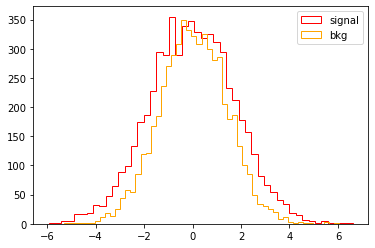

600GeV
lepton3_eta


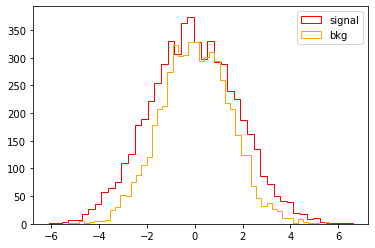

600GeV
lepton1_phi


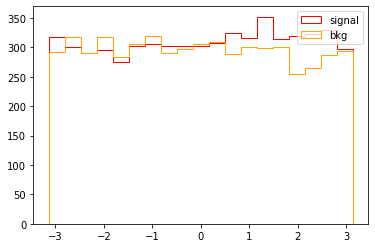

600GeV
lepton2_phi


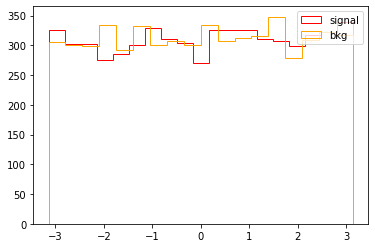

600GeV
lepton3_phi


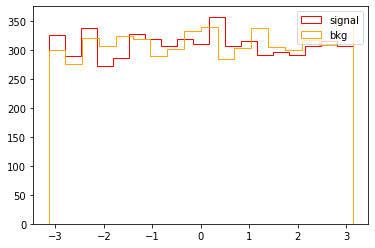

600GeV
MET


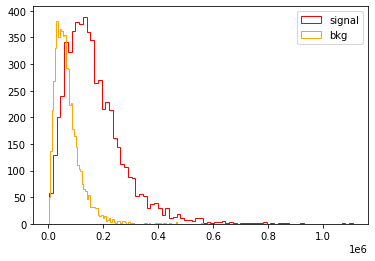

600GeV
MET_phi


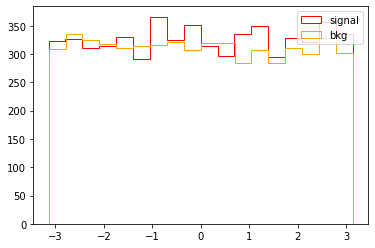

600GeV
lepton1_flavor


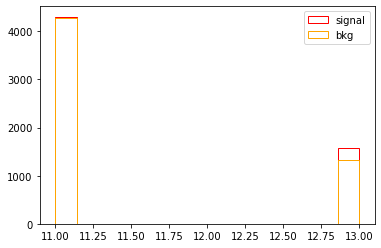

600GeV
lepton2_flavor


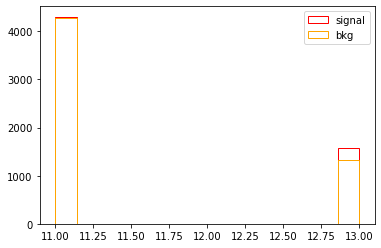

600GeV
lepton3_flavor


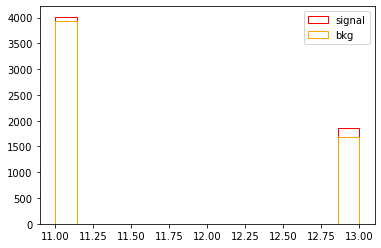

600GeV
lepton1_charge


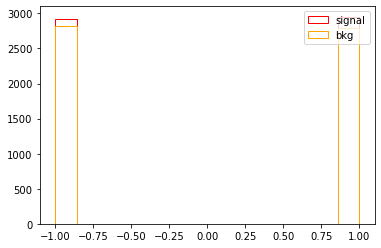

600GeV
lepton2_charge


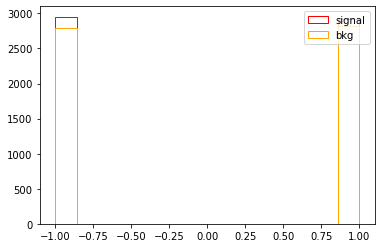

600GeV
lepton3_charge


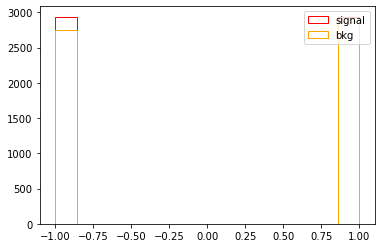

600GeV
visible_pt


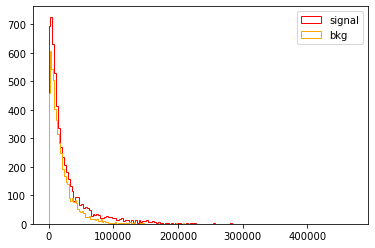

600GeV
transverse_mass


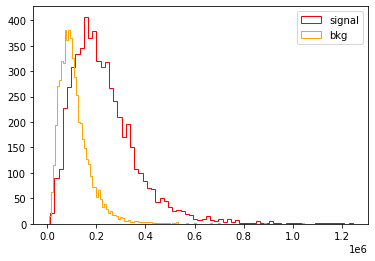

600GeV
dilep_mass


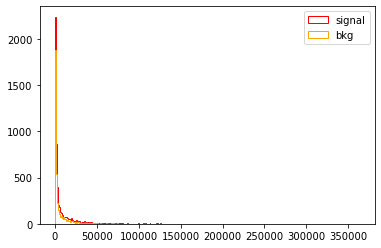

600GeV
dilep_DR


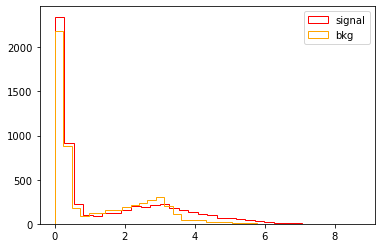

600GeV
signal


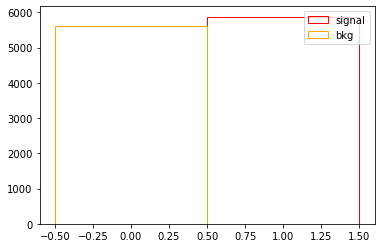

700GeV
lepton1_pt


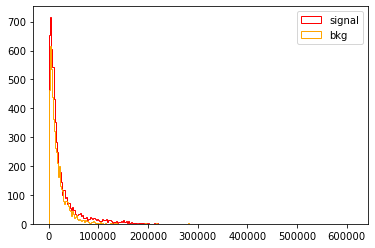

700GeV
lepton2_pt


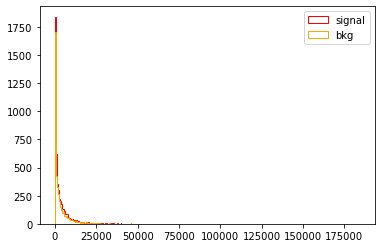

700GeV
lepton3_pt


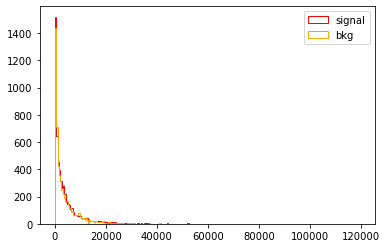

700GeV
lepton1_eta


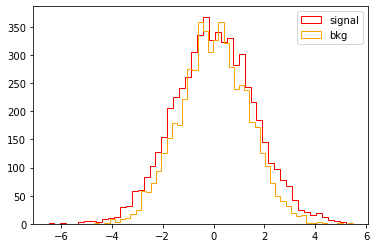

700GeV
lepton2_eta


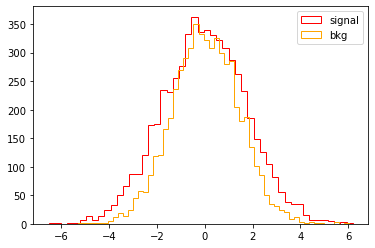

700GeV
lepton3_eta


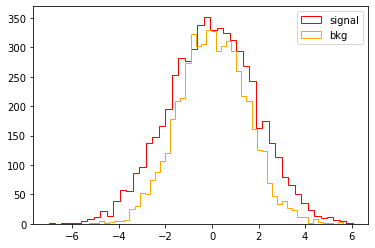

700GeV
lepton1_phi


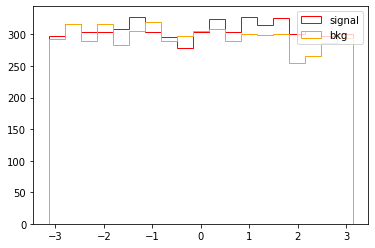

700GeV
lepton2_phi


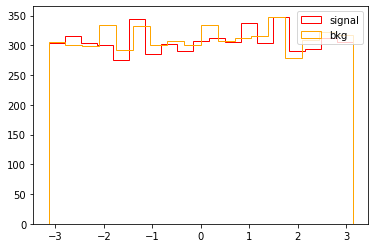

700GeV
lepton3_phi


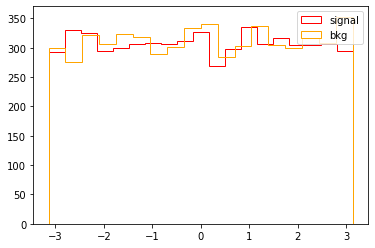

700GeV
MET


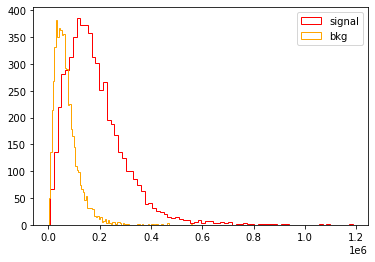

700GeV
MET_phi


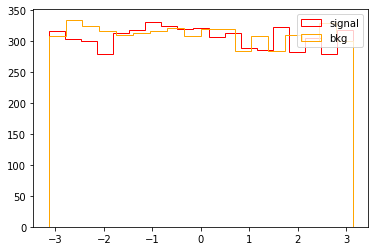

700GeV
lepton1_flavor


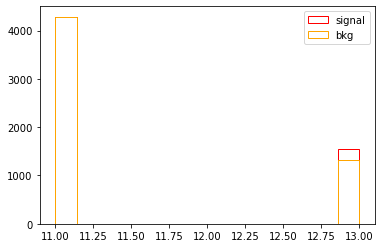

700GeV
lepton2_flavor


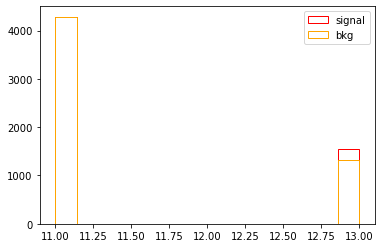

700GeV
lepton3_flavor


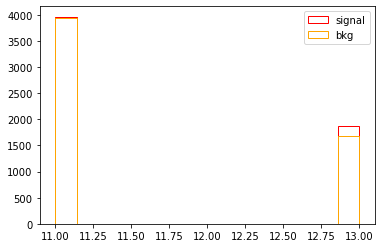

700GeV
lepton1_charge


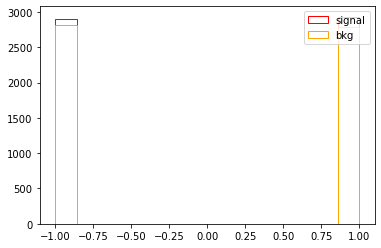

700GeV
lepton2_charge


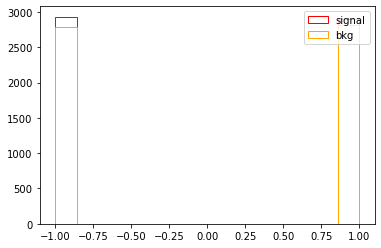

700GeV
lepton3_charge


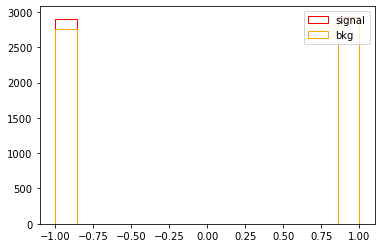

700GeV
visible_pt


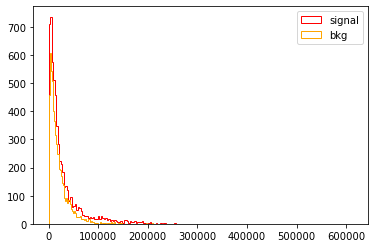

700GeV
transverse_mass


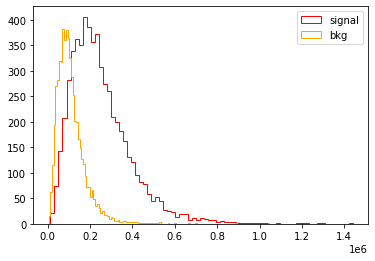

700GeV
dilep_mass


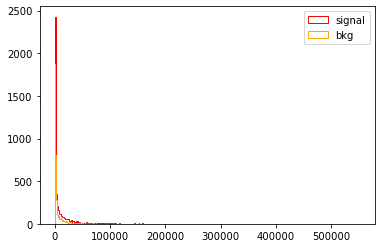

700GeV
dilep_DR


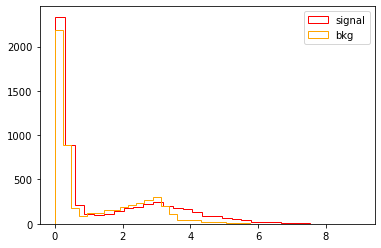

700GeV
signal


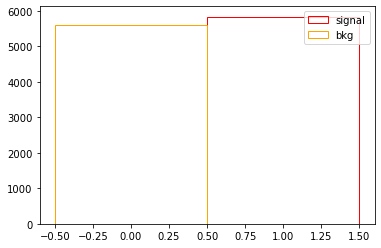

800GeV
lepton1_pt


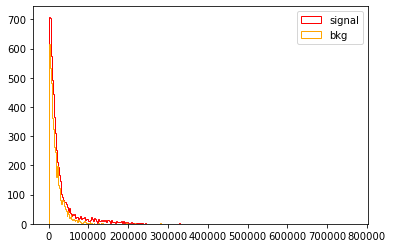

800GeV
lepton2_pt


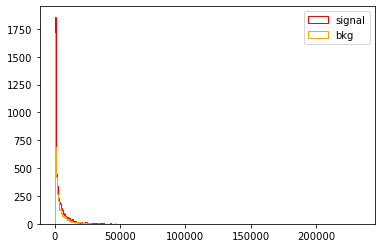

800GeV
lepton3_pt


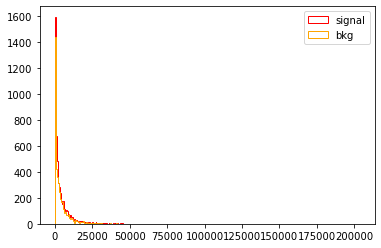

800GeV
lepton1_eta


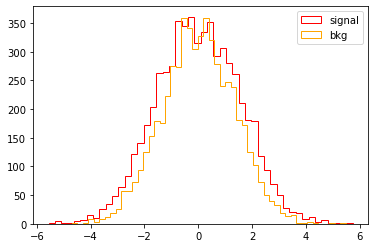

800GeV
lepton2_eta


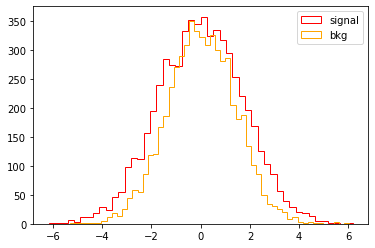

800GeV
lepton3_eta


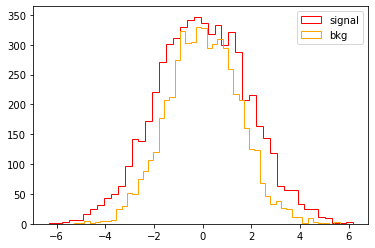

800GeV
lepton1_phi


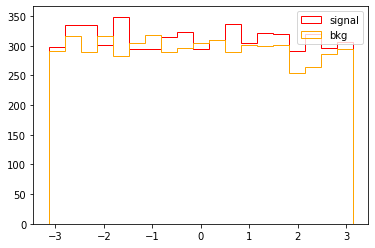

800GeV
lepton2_phi


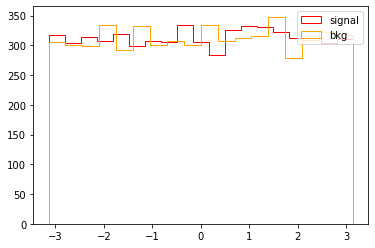

800GeV
lepton3_phi


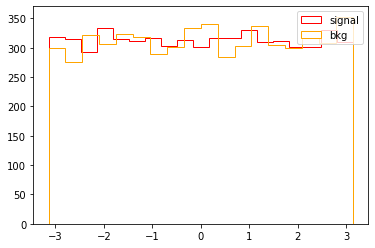

800GeV
MET


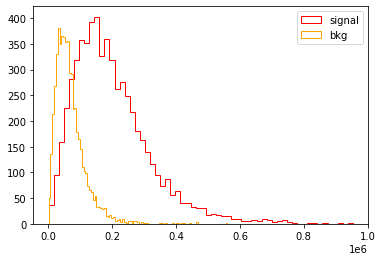

800GeV
MET_phi


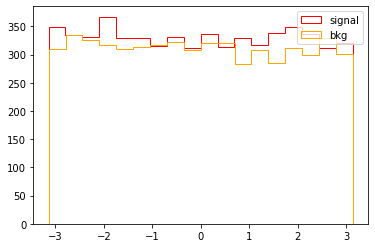

800GeV
lepton1_flavor


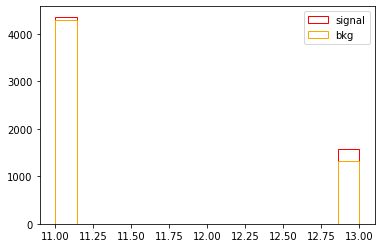

800GeV
lepton2_flavor


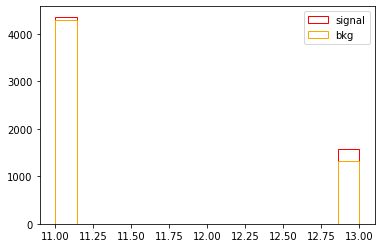

800GeV
lepton3_flavor


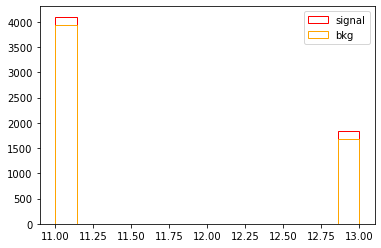

800GeV
lepton1_charge


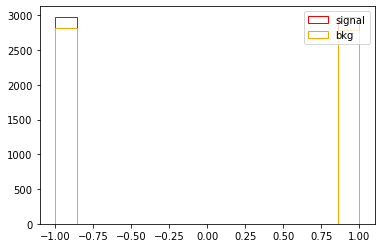

800GeV
lepton2_charge


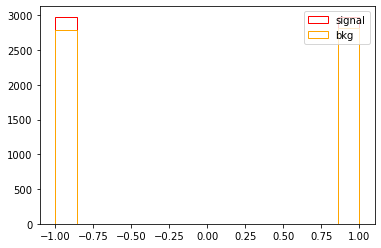

800GeV
lepton3_charge


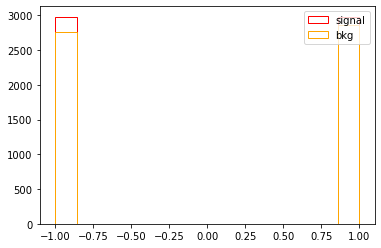

800GeV
visible_pt


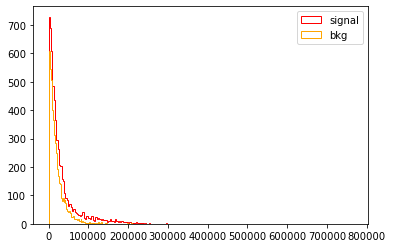

800GeV
transverse_mass


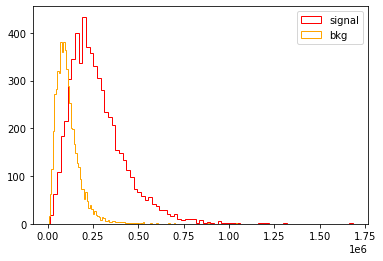

800GeV
dilep_mass


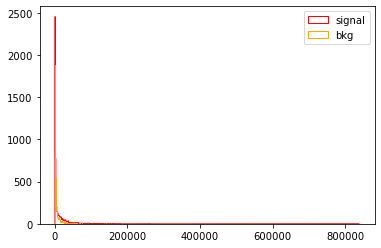

800GeV
dilep_DR


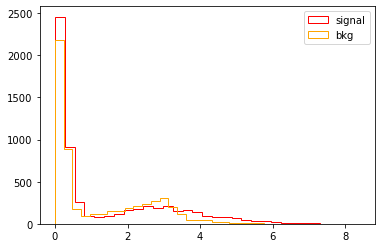

800GeV
signal


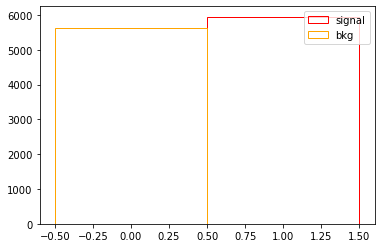

1000GeV
lepton1_pt


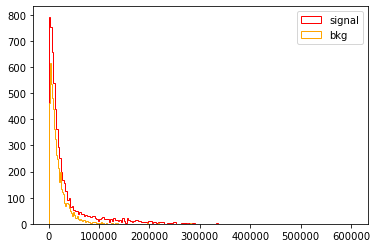

1000GeV
lepton2_pt


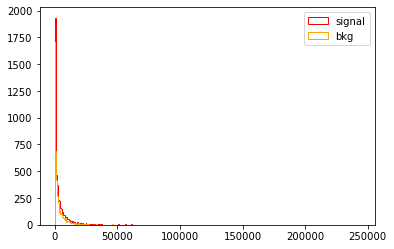

1000GeV
lepton3_pt


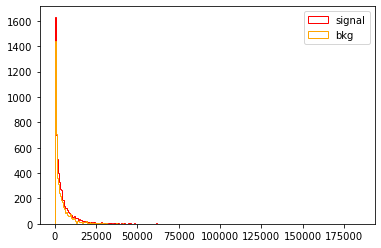

1000GeV
lepton1_eta


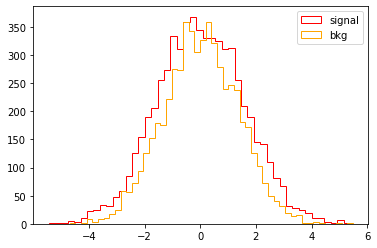

1000GeV
lepton2_eta


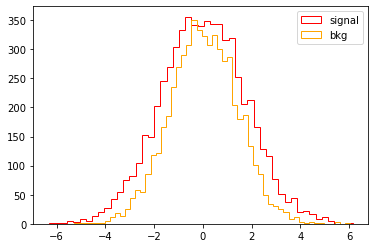

1000GeV
lepton3_eta


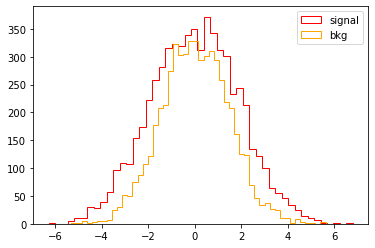

1000GeV
lepton1_phi


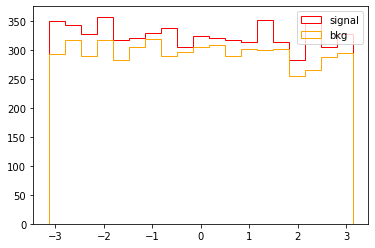

1000GeV
lepton2_phi


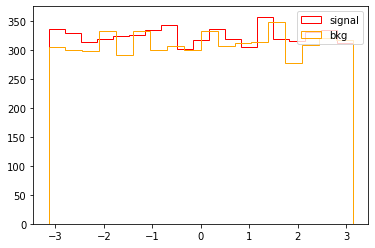

1000GeV
lepton3_phi


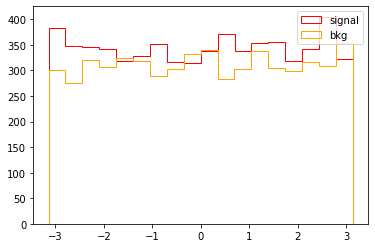

1000GeV
MET


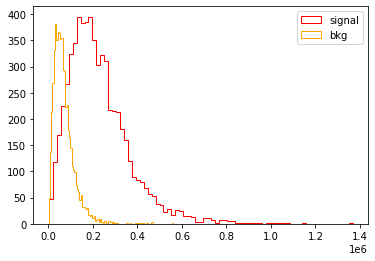

1000GeV
MET_phi


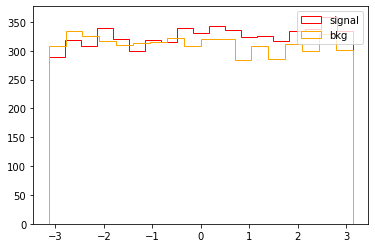

1000GeV
lepton1_flavor


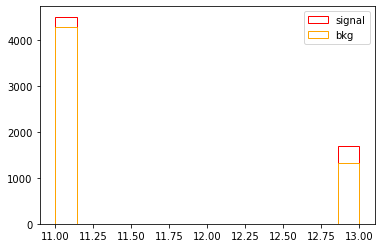

1000GeV
lepton2_flavor


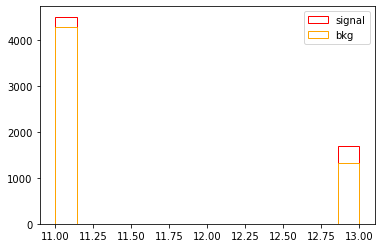

1000GeV
lepton3_flavor


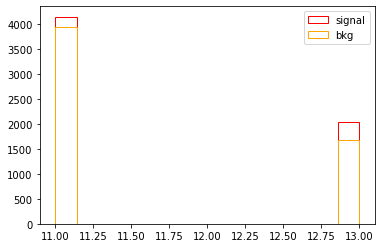

1000GeV
lepton1_charge


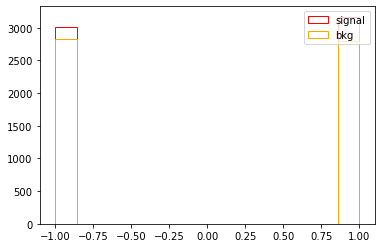

1000GeV
lepton2_charge


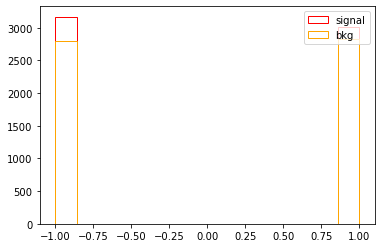

1000GeV
lepton3_charge


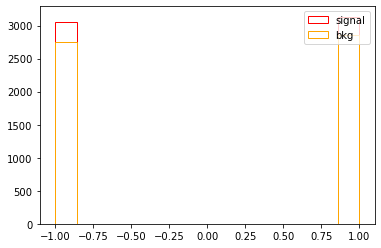

1000GeV
visible_pt


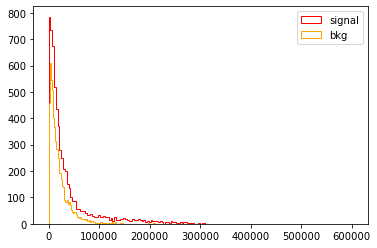

1000GeV
transverse_mass


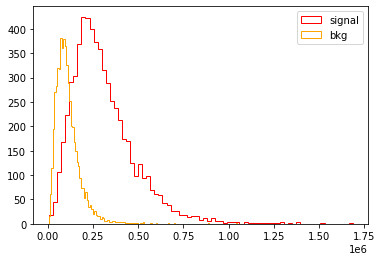

1000GeV
dilep_mass


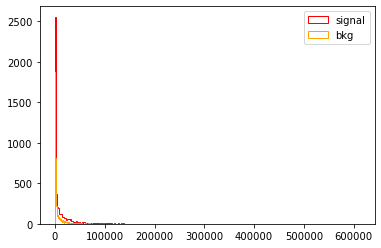

1000GeV
dilep_DR


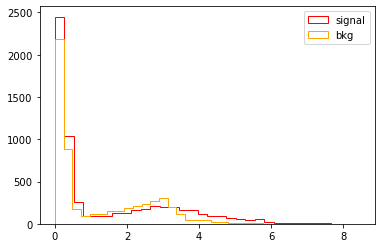

1000GeV
signal


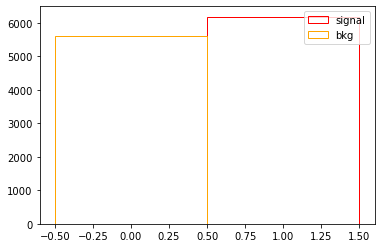

In [18]:
SignalPlotLoop(df_sig, df_bkg)

In [19]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()

def standardize_stuff(n):
    print ("HI", n, n.min(),n.max())
    return (n - n.min())/(n.max() - n.min())

In [20]:
series_list_500 = []
series_list_600 = [] 
series_list_700 = []
series_list_800 = [] 
series_list_1000 = []
series_list = [series_list_500,series_list_600,series_list_700,series_list_800,series_list_1000]
df_norm_sig = ['df_norm_sig500','df_norm_sig600','df_norm_sig700','df_norm_sig800','df_norm_sig1000']

In [21]:
#standardize signal stuff
for sig in range(len(df_sig)):
    for var in df_sig[sig].columns:
        print(mass_points[sig])
        print(var)
        if var == "signal":
            series_list[sig].append(df_sig[sig][var])
            continue
        #    if "flavor" or "charge" in var:
        #        series_list.append(df_sig[var])
        #        continue
        print (df_sig[sig][var])
        print (df_sig[sig][var].min())
        print (df_sig[sig][var].max())
        print (standardize_stuff(df_sig[sig][var]))
        print (series_list[sig].append((df_sig[sig][var] - df_sig[sig][var].min())/(df_sig[sig][var].max() - df_sig[sig][var].min())))

    df_norm_sig[sig] = pd.DataFrame(series_list[sig]).T

500GeV
lepton1_pt
0        2770.396925
1        2726.178737
2        1243.218286
3       93824.660163
4       11453.212968
            ...     
5597    37037.946428
5598     1120.379646
5599      812.361404
5600    10965.001562
5601    11710.726426
Name: lepton1_pt, Length: 5602, dtype: float64
29.185268648886566
442164.4653465807
HI 0        2770.396925
1        2726.178737
2        1243.218286
3       93824.660163
4       11453.212968
            ...     
5597    37037.946428
5598     1120.379646
5599      812.361404
5600    10965.001562
5601    11710.726426
Name: lepton1_pt, Length: 5602, dtype: float64 29.185268648886566 442164.4653465807
0       0.006200
1       0.006100
2       0.002746
3       0.212142
4       0.025838
          ...   
5597    0.083705
5598    0.002468
5599    0.001771
5600    0.024734
5601    0.026421
Name: lepton1_pt, Length: 5602, dtype: float64
None
500GeV
lepton2_pt
0         45.166988
1       1237.999628
2        425.821629
3       3278.837705
4       5979

0       0.266517
1       0.221527
2       0.084510
3       0.126569
4       0.172784
          ...   
5597    0.189154
5598    0.179413
5599    0.022606
5600    0.347030
5601    0.173479
Name: transverse_mass, Length: 5602, dtype: float64
None
500GeV
dilep_mass
0        2601.919835
1         212.196914
2           2.934687
3       35396.099195
4       43655.548274
            ...     
5597      844.237978
5598        2.957987
5599        4.480095
5600    27108.811157
5601     2751.583087
Name: dilep_mass, Length: 5602, dtype: float64
-35.01914868377204
669215.1357778228
HI 0        2601.919835
1         212.196914
2           2.934687
3       35396.099195
4       43655.548274
            ...     
5597      844.237978
5598        2.957987
5599        4.480095
5600    27108.811157
5601     2751.583087
Name: dilep_mass, Length: 5602, dtype: float64 -35.01914868377204 669215.1357778228
0       0.003940
1       0.000369
2       0.000057
3       0.052942
4       0.065283
          ...   
559

700GeV
lepton1_pt
0       75257.848158
1        1296.383471
2       32095.458434
3        8519.361745
4       14174.682177
            ...     
5832     3735.828570
5833    23325.194036
5834    10212.761944
5835     9949.264878
5836    23490.852520
Name: lepton1_pt, Length: 5837, dtype: float64
46.98375287617311
612490.2079948944
HI 0       75257.848158
1        1296.383471
2       32095.458434
3        8519.361745
4       14174.682177
            ...     
5832     3735.828570
5833    23325.194036
5834    10212.761944
5835     9949.264878
5836    23490.852520
Name: lepton1_pt, Length: 5837, dtype: float64 46.98375287617311 612490.2079948944
0       0.122805
1       0.002040
2       0.052329
3       0.013834
4       0.023068
          ...   
5832    0.006023
5833    0.038009
5834    0.016599
5835    0.016168
5836    0.038279
Name: lepton1_pt, Length: 5837, dtype: float64
None
700GeV
lepton2_pt
0         56.699886
1        270.918535
2       7812.173315
3       1194.813600
4       2995.8

5.822784263178384e-05
8.992175768575628
HI 0       5.098006
1       0.041673
2       0.155758
3       0.174517
4       0.214155
          ...   
5832    0.002724
5833    0.081507
5834    0.315931
5835    2.863936
5836    3.491577
Name: dilep_DR, Length: 5837, dtype: float64 5.822784263178384e-05 8.992175768575628
0       0.566935
1       0.004628
2       0.017315
3       0.019401
4       0.023809
          ...   
5832    0.000296
5833    0.009058
5834    0.035128
5835    0.318488
5836    0.388287
Name: dilep_DR, Length: 5837, dtype: float64
None
700GeV
signal
800GeV
lepton1_pt
0       194774.232977
1        17392.917636
2        30522.390804
3       143078.289113
4         9755.368163
            ...      
5944     13182.975583
5945      1220.759730
5946      7272.506836
5947      8539.730058
5948      6317.996089
Name: lepton1_pt, Length: 5949, dtype: float64
73.22669262736109
764685.793603
HI 0       194774.232977
1        17392.917636
2        30522.390804
3       143078.289113
4   

1000GeV
lepton1_pt
0       13878.053709
1       16340.585127
2        9065.490844
3       22132.746151
4        2387.941884
            ...     
6183      300.431171
6184      836.260046
6185    42454.765969
6186    22089.550998
6187     7604.042734
Name: lepton1_pt, Length: 6188, dtype: float64
45.27464784604386
603597.0799772441
HI 0       13878.053709
1       16340.585127
2        9065.490844
3       22132.746151
4        2387.941884
            ...     
6183      300.431171
6184      836.260046
6185    42454.765969
6186    22089.550998
6187     7604.042734
Name: lepton1_pt, Length: 6188, dtype: float64 45.27464784604386 603597.0799772441
0       0.022919
1       0.026999
2       0.014945
3       0.036596
4       0.003881
          ...   
6183    0.000423
6184    0.001311
6185    0.070267
6186    0.036524
6187    0.012524
Name: lepton1_pt, Length: 6188, dtype: float64
None
1000GeV
lepton2_pt
0        6248.952348
1         509.431960
2        6543.479877
3        2157.376751
4       

In [22]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
#    if "flavor" or "charge" in var:
#        series_list_bkg.append(df_bkg[var])
#        continue
#    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_bkg[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton1_pt
25.67970828120116
327434.81493253814
HI 0         1433.540521
1        17335.331964
2        14254.047396
3         8000.201489
4         7865.593031
            ...      
5609    126561.741315
5610     36042.884731
5611      7442.559784
5612     51448.649448
5613     48323.130273
Name: lepton1_pt, Length: 5614, dtype: float64 25.67970828120116 327434.81493253814
0       0.004300
1       0.052869
2       0.043457
3       0.024356
4       0.023945
          ...   
5609    0.386477
5610    0.110007
5611    0.022653
5612    0.157060
5613    0.147514
Name: lepton1_pt, Length: 5614, dtype: float64
None
lepton2_pt
0.5513056336402389
183971.518057394
HI 0        1428.251099
1       15230.525699
2        1364.183916
3        1030.694047
4         296.296542
            ...     
5609      642.182162
5610     8764.140390
5611     1350.704520
5612      105.273454
5613     3553.677058
Name: lepton2_pt, Length: 5614, dtype: float64 0.5513056336402389 183971.518057394
0       0.007760
1  

In [23]:
df_norm_bkg

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,...,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge,visible_pt,transverse_mass,dilep_mass,dilep_DR,signal
0,0.004300,0.007760,0.006469,0.597284,0.393643,0.408465,0.929376,0.876810,0.876737,0.086955,...,0.0,0.0,0.0,1.0,0.0,0.008589,0.048483,0.011116,0.345554,0.0
1,0.052869,0.082785,0.091536,0.403864,0.409602,0.479235,0.888333,0.885202,0.691202,0.255797,...,0.0,1.0,1.0,0.0,1.0,0.090610,0.180306,0.003395,0.011023,0.0
2,0.043457,0.007412,0.034324,0.541165,0.571337,0.576101,0.998321,0.309260,0.271693,0.070955,...,0.0,1.0,0.0,1.0,0.0,0.034087,0.058133,0.021267,0.306264,0.0
3,0.024356,0.005599,0.001567,0.317917,0.802710,0.801577,0.677896,0.688246,0.691797,0.129377,...,1.0,0.0,1.0,0.0,0.0,0.022141,0.107570,0.112118,0.810414,0.0
4,0.023945,0.001608,0.032101,0.597787,0.477105,0.496019,0.071050,0.651493,0.649938,0.179349,...,0.0,0.0,0.0,1.0,0.0,0.011182,0.111565,0.010334,0.451425,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5609,0.386477,0.003488,0.007670,0.549263,0.343938,0.567377,0.046914,0.519054,0.045269,0.090684,...,0.0,0.0,0.0,1.0,0.0,0.305342,0.183943,0.088257,0.577511,0.0
5610,0.110007,0.047636,0.046398,0.580281,0.559892,0.530052,0.228594,0.228697,0.861439,0.068855,...,0.0,1.0,1.0,0.0,1.0,0.099343,0.095807,0.008248,0.024940,0.0
5611,0.022653,0.007339,0.056381,0.631477,0.619579,0.616840,0.995233,0.590030,0.999685,0.116479,...,1.0,0.0,1.0,0.0,0.0,0.031416,0.091054,0.017258,0.392213,0.0
5612,0.157060,0.000569,0.236973,0.453119,0.471715,0.516443,0.238406,0.192472,0.466984,0.108254,...,0.0,1.0,1.0,0.0,0.0,0.149337,0.132545,0.002195,0.048989,0.0


500GeV
lepton1_pt


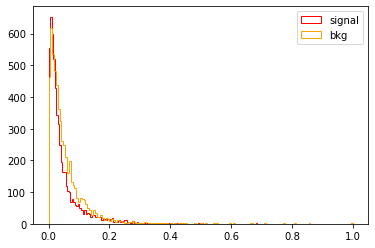

500GeV
lepton2_pt


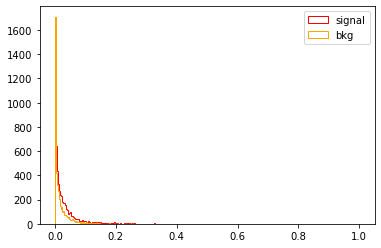

500GeV
lepton3_pt


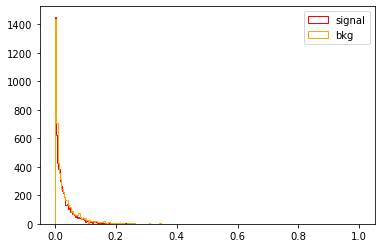

500GeV
lepton1_eta


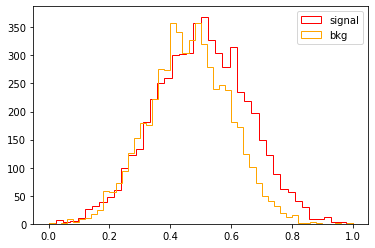

500GeV
lepton2_eta


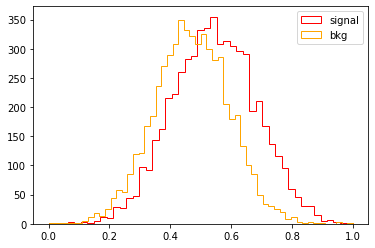

500GeV
lepton3_eta


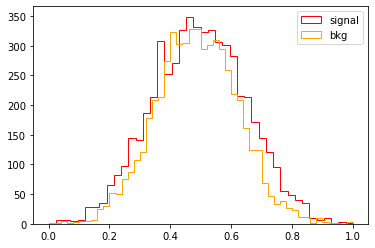

500GeV
lepton1_phi


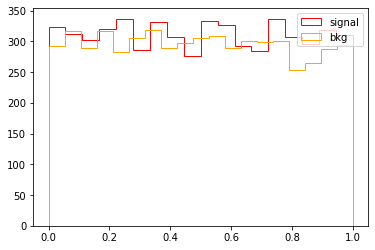

500GeV
lepton2_phi


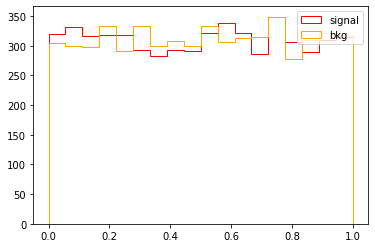

500GeV
lepton3_phi


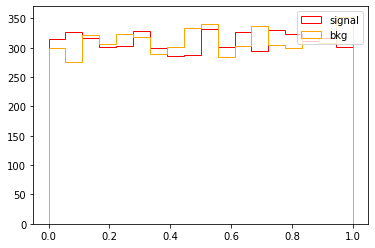

500GeV
MET


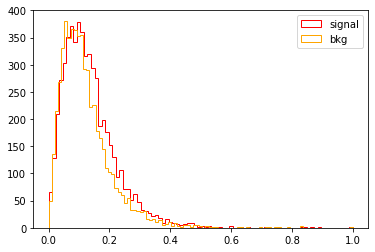

500GeV
MET_phi


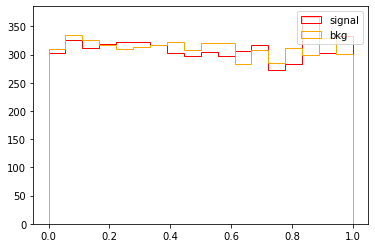

500GeV
lepton1_flavor


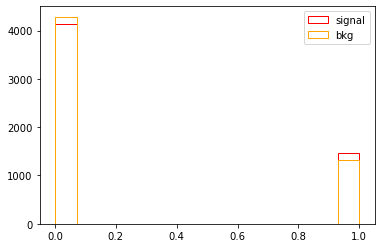

500GeV
lepton2_flavor


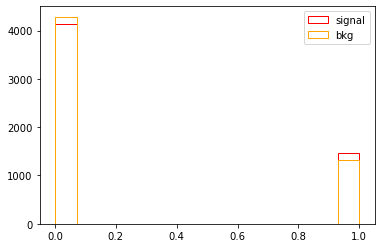

500GeV
lepton3_flavor


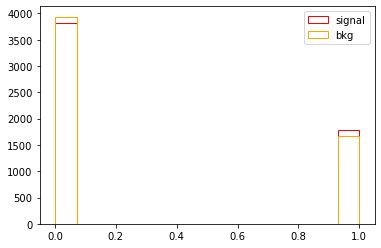

500GeV
lepton1_charge


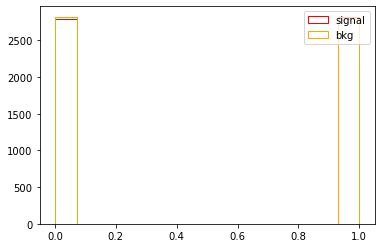

500GeV
lepton2_charge


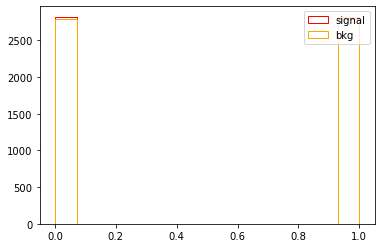

500GeV
lepton3_charge


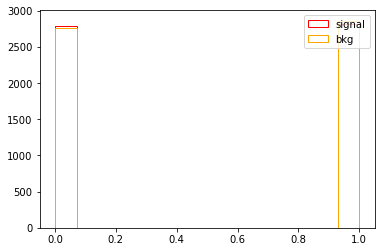

500GeV
visible_pt


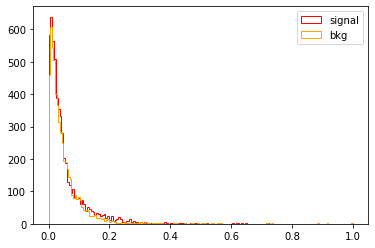

500GeV
transverse_mass


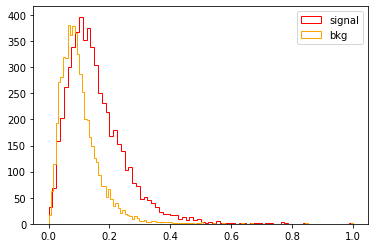

500GeV
dilep_mass


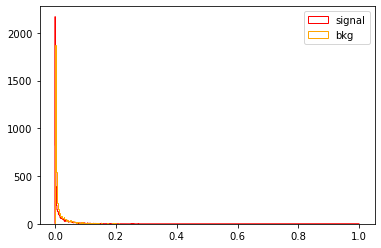

500GeV
dilep_DR


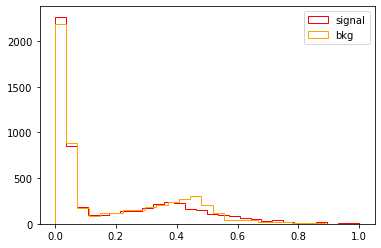

500GeV
signal


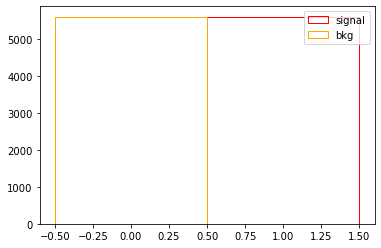

600GeV
lepton1_pt


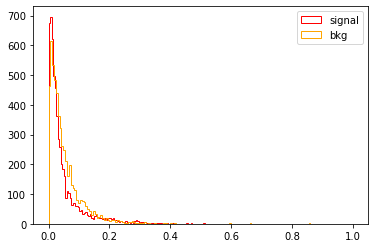

600GeV
lepton2_pt


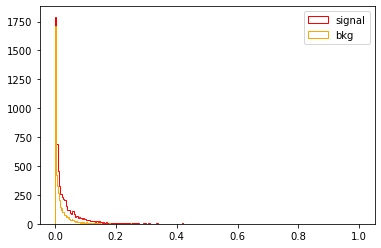

600GeV
lepton3_pt


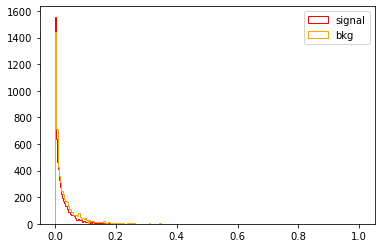

600GeV
lepton1_eta


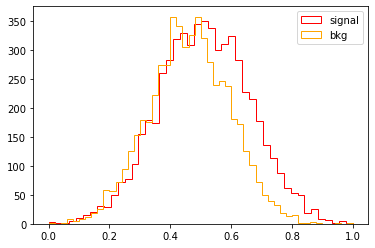

600GeV
lepton2_eta


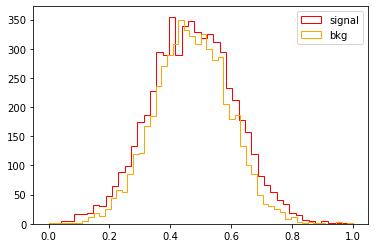

600GeV
lepton3_eta


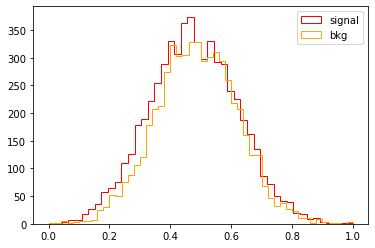

600GeV
lepton1_phi


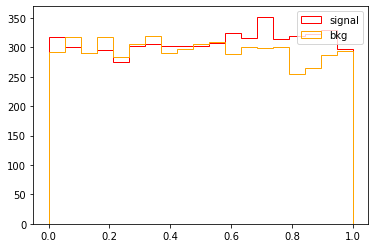

600GeV
lepton2_phi


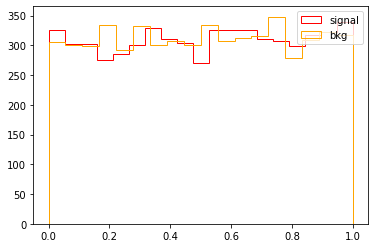

600GeV
lepton3_phi


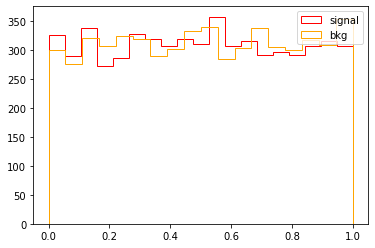

600GeV
MET


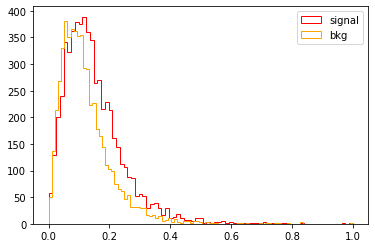

600GeV
MET_phi


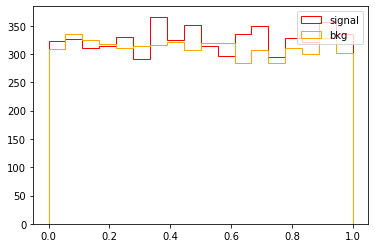

600GeV
lepton1_flavor


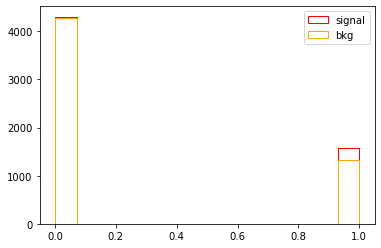

600GeV
lepton2_flavor


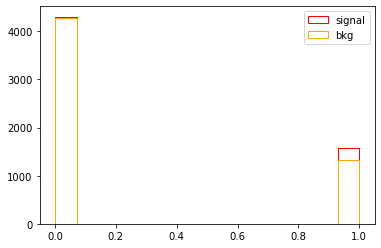

600GeV
lepton3_flavor


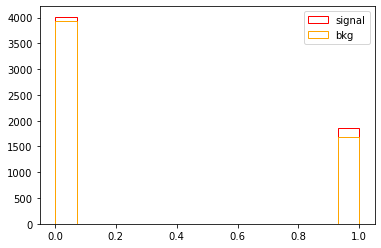

600GeV
lepton1_charge


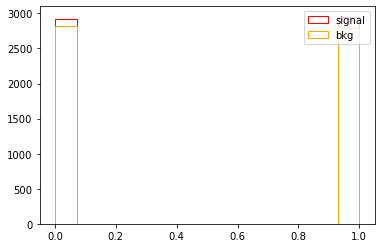

600GeV
lepton2_charge


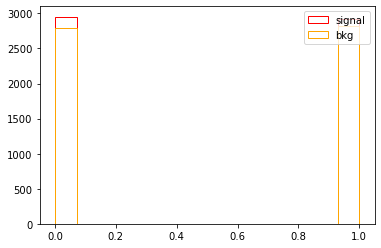

600GeV
lepton3_charge


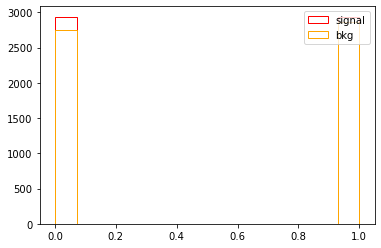

600GeV
visible_pt


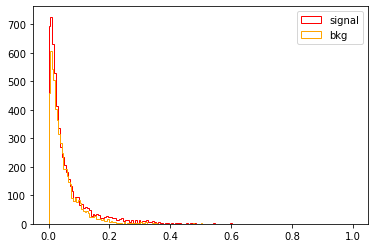

600GeV
transverse_mass


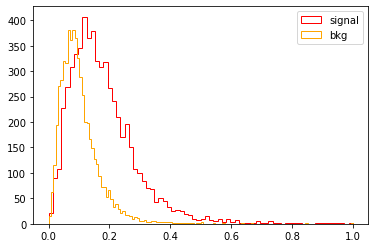

600GeV
dilep_mass


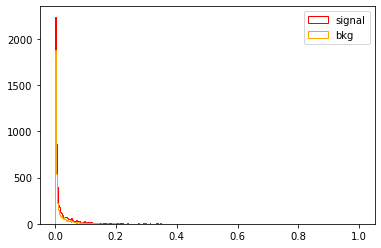

600GeV
dilep_DR


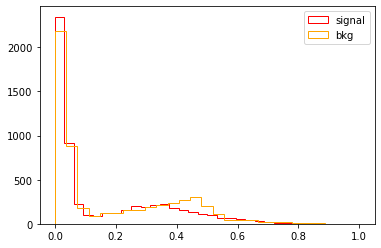

600GeV
signal


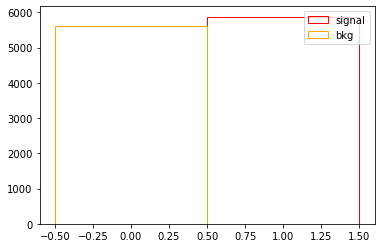

700GeV
lepton1_pt


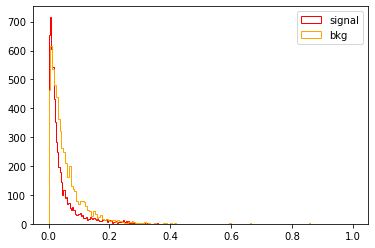

700GeV
lepton2_pt


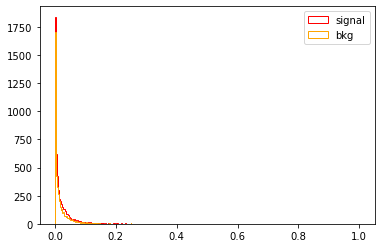

700GeV
lepton3_pt


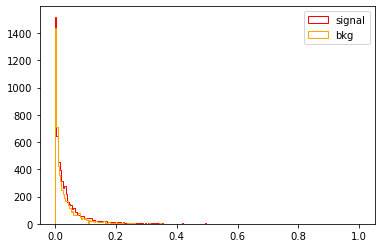

700GeV
lepton1_eta


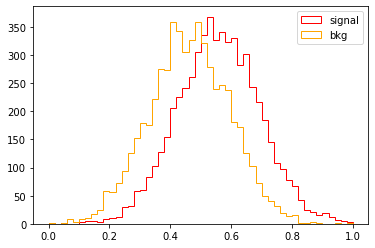

700GeV
lepton2_eta


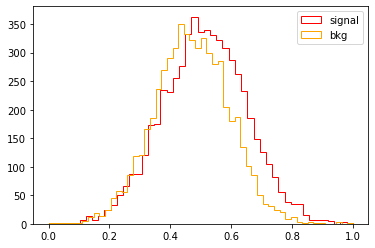

700GeV
lepton3_eta


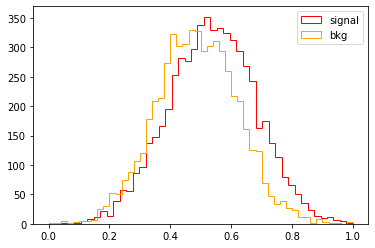

700GeV
lepton1_phi


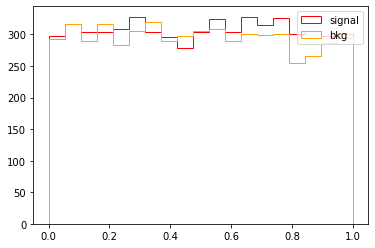

700GeV
lepton2_phi


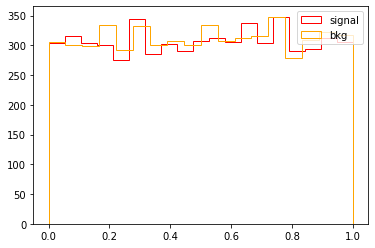

700GeV
lepton3_phi


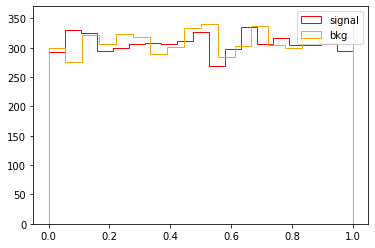

700GeV
MET


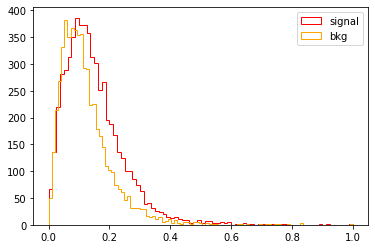

700GeV
MET_phi


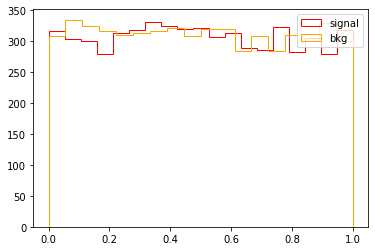

700GeV
lepton1_flavor


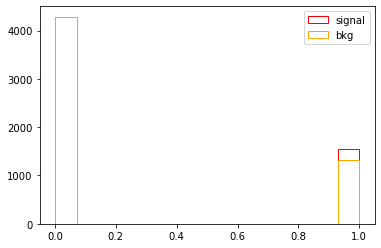

700GeV
lepton2_flavor


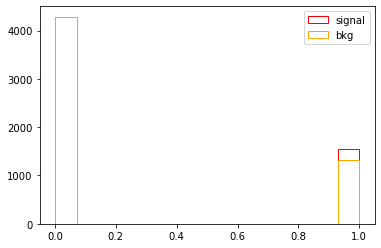

700GeV
lepton3_flavor


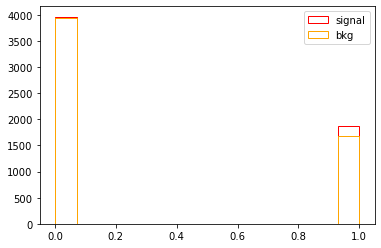

700GeV
lepton1_charge


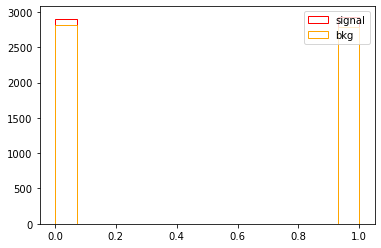

700GeV
lepton2_charge


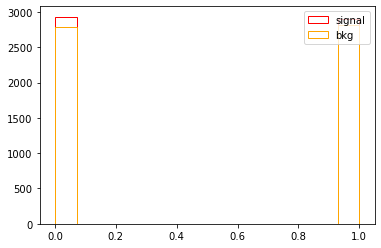

700GeV
lepton3_charge


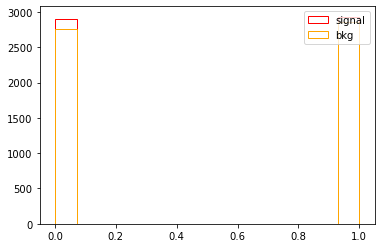

700GeV
visible_pt


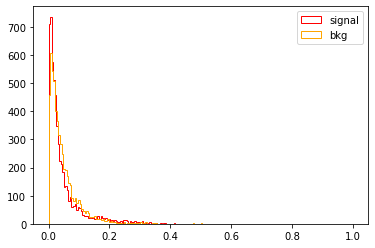

700GeV
transverse_mass


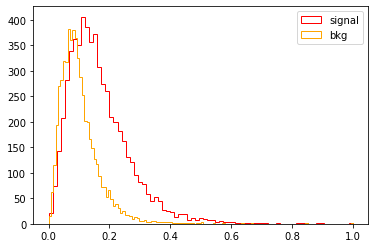

700GeV
dilep_mass


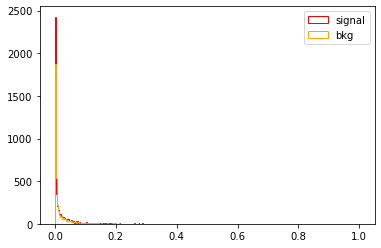

700GeV
dilep_DR


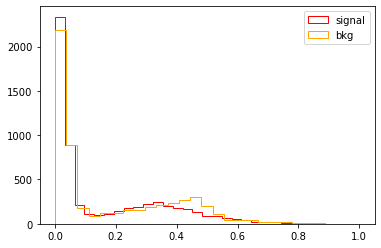

700GeV
signal


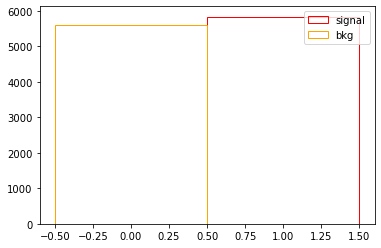

800GeV
lepton1_pt


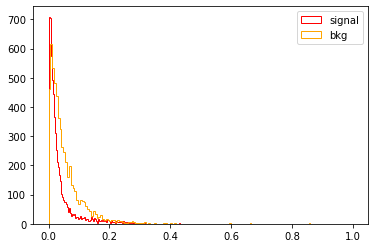

800GeV
lepton2_pt


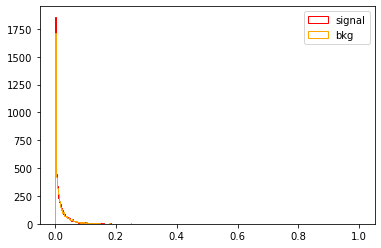

800GeV
lepton3_pt


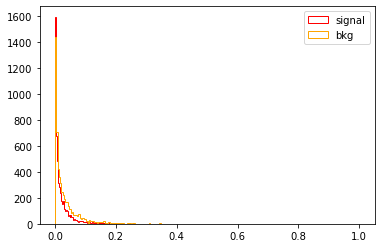

800GeV
lepton1_eta


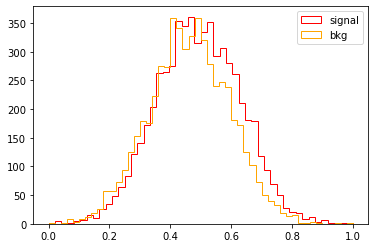

800GeV
lepton2_eta


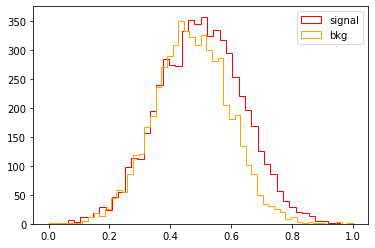

800GeV
lepton3_eta


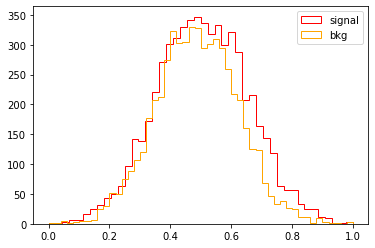

800GeV
lepton1_phi


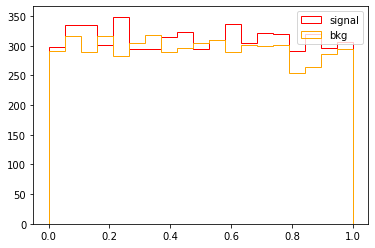

800GeV
lepton2_phi


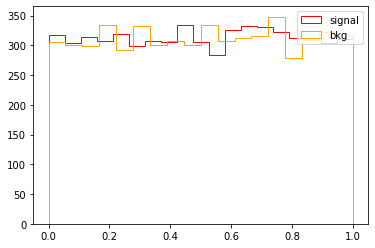

800GeV
lepton3_phi


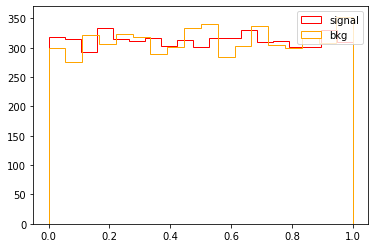

800GeV
MET


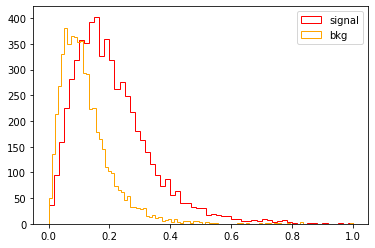

800GeV
MET_phi


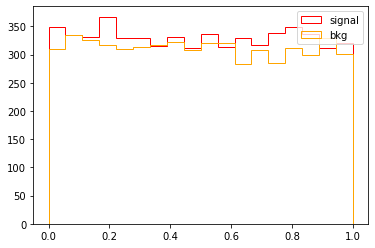

800GeV
lepton1_flavor


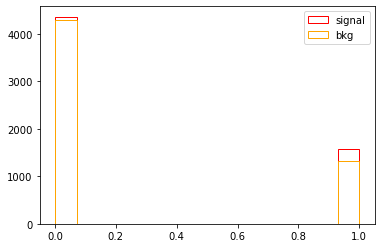

800GeV
lepton2_flavor


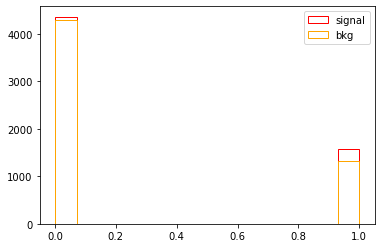

800GeV
lepton3_flavor


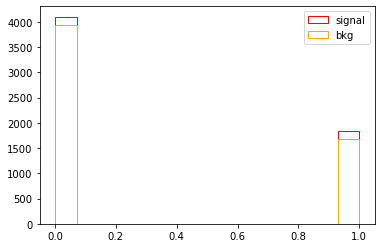

800GeV
lepton1_charge


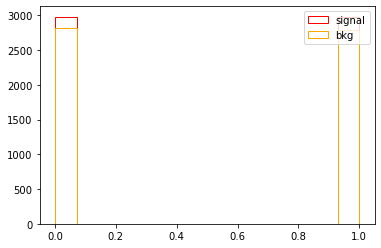

800GeV
lepton2_charge


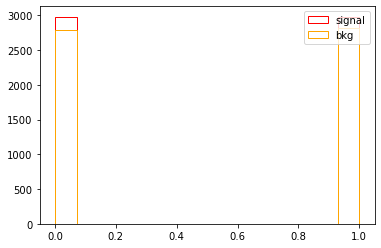

800GeV
lepton3_charge


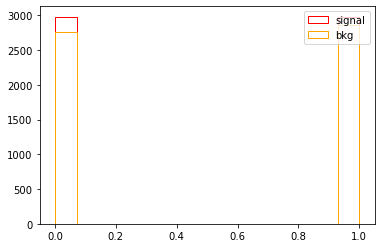

800GeV
visible_pt


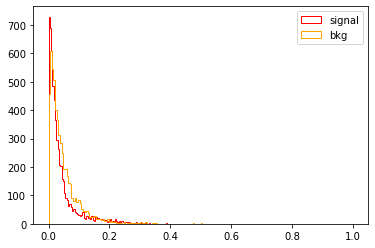

800GeV
transverse_mass


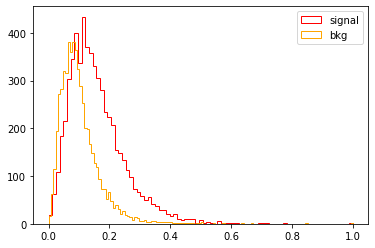

800GeV
dilep_mass


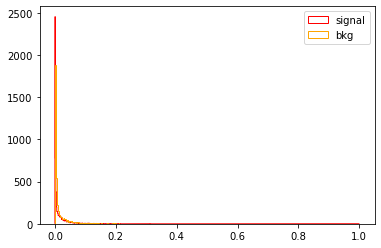

800GeV
dilep_DR


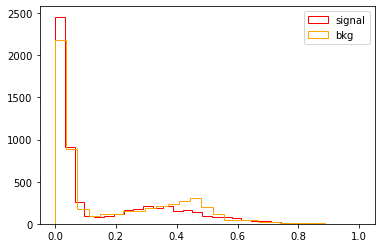

800GeV
signal


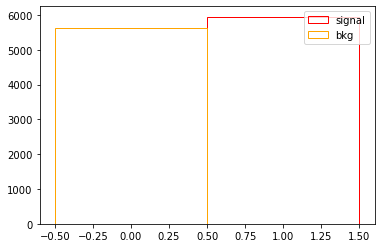

1000GeV
lepton1_pt


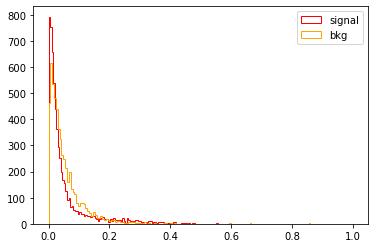

1000GeV
lepton2_pt


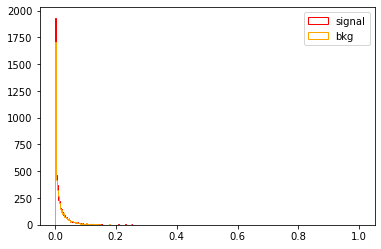

1000GeV
lepton3_pt


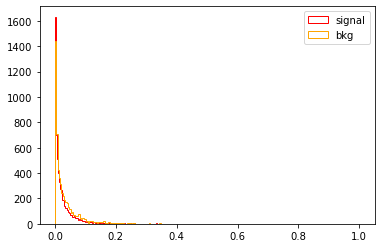

1000GeV
lepton1_eta


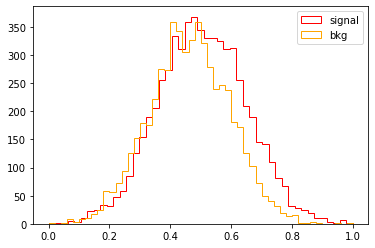

1000GeV
lepton2_eta


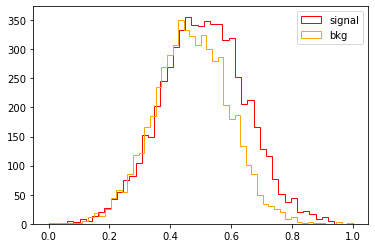

1000GeV
lepton3_eta


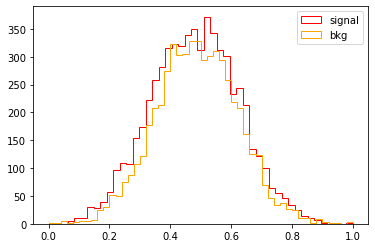

1000GeV
lepton1_phi


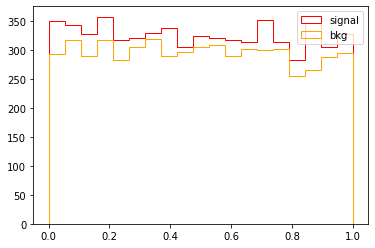

1000GeV
lepton2_phi


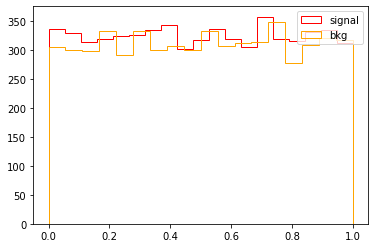

1000GeV
lepton3_phi


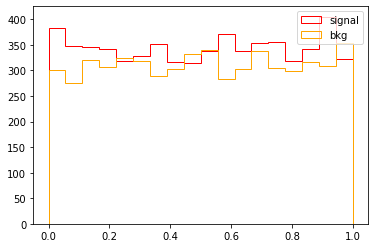

1000GeV
MET


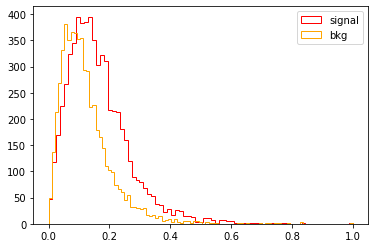

1000GeV
MET_phi


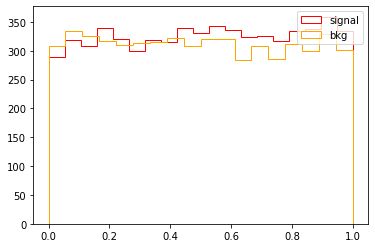

1000GeV
lepton1_flavor


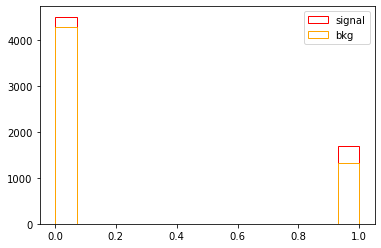

1000GeV
lepton2_flavor


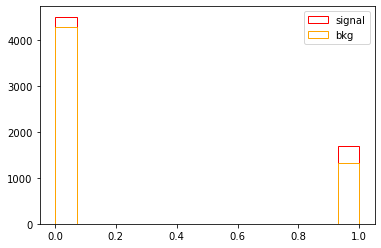

1000GeV
lepton3_flavor


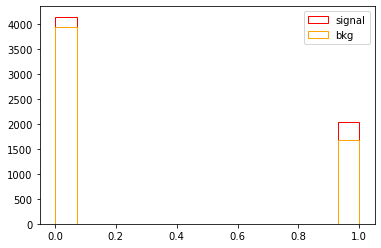

1000GeV
lepton1_charge


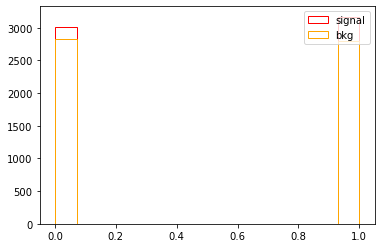

1000GeV
lepton2_charge


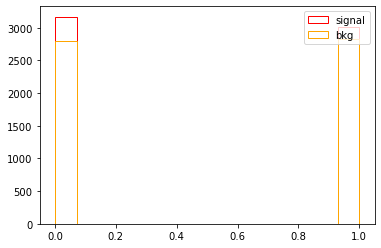

1000GeV
lepton3_charge


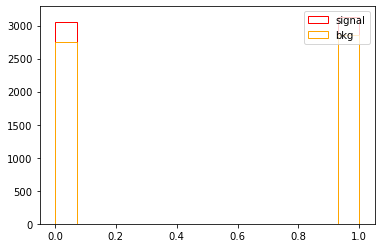

1000GeV
visible_pt


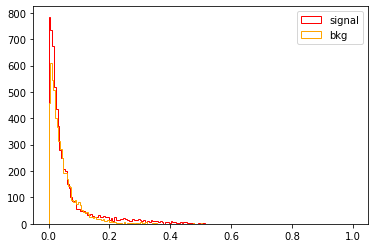

1000GeV
transverse_mass


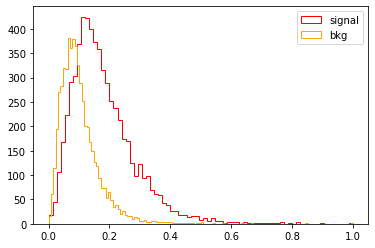

1000GeV
dilep_mass


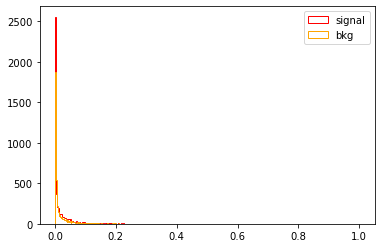

1000GeV
dilep_DR


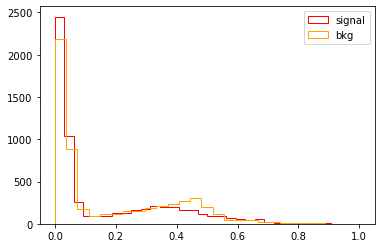

1000GeV
signal


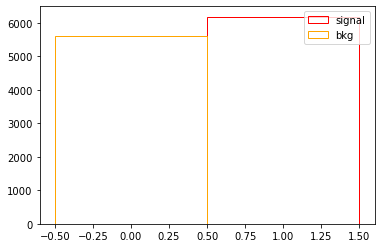

In [24]:
SignalPlotLoop(df_norm_sig, df_norm_bkg)

In [25]:
#using 80% of the (signal + bkg) data for training and the rest for test
#n_sig = [int(7138*80/100),int(7413*80/100),int(7695*80/100),int(7919*80/100),int(8279*80/100)]
#n_bkg = int(31979*80/100)
n_sig = [int(56570*80/100),int(57366*80/100),int(57129*80/100),int(57494*80/100),int(57905*80/100)]
n_bkg = int(55765*80/100)
#n_sig = [int(n_sig_scaled[0]*9999*80/100),int(n_sig_scaled[1]*10000*80/100),int(n_sig_scaled[2]*9998*80/100),int(n_sig_scaled[3]*10000*80/100),int(n_sig_scaled[4]*9999*80/100)]
#n_bkg = int(n_bkg_scaled*80473*80/100)

In [26]:
df_train_500, df_test_500, x_train_500, y_train_500, x_test_500, y_test_500 = DefineTrainTest(df_norm_sig[0], df_norm_bkg, n_sig[0])
df_train_600, df_test_600, x_train_600, y_train_600, x_test_600, y_test_600 = DefineTrainTest(df_norm_sig[1], df_norm_bkg, n_sig[1])
df_train_700, df_test_700, x_train_700, y_train_700, x_test_700, y_test_700 = DefineTrainTest(df_norm_sig[2], df_norm_bkg, n_sig[2])
df_train_800, df_test_800, x_train_800, y_train_800, x_test_800, y_test_800 = DefineTrainTest(df_norm_sig[3], df_norm_bkg, n_sig[3])
df_train_1000, df_test_1000, x_train_1000, y_train_1000, x_test_1000, y_test_1000 = DefineTrainTest(df_norm_sig[4], df_norm_bkg, n_sig[4])

In [27]:
df_train = [df_train_500,df_train_600,df_train_700,df_train_800,df_train_1000]
df_test = [df_test_500,df_test_600,df_test_700,df_test_800,df_test_1000]
x_train = [x_train_500,x_train_600,x_train_700,x_train_800,x_train_1000]
y_train = [y_train_500,y_train_600,y_train_700,y_train_800,y_train_1000]
x_test = [x_test_500,x_test_600,x_test_700,x_test_800,x_test_1000]
y_test = [y_test_500,y_test_600,y_test_700,y_test_800,y_test_1000]

500GeV
lepton1_pt


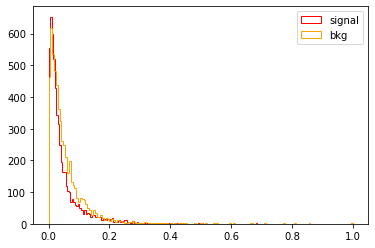

500GeV
lepton2_pt


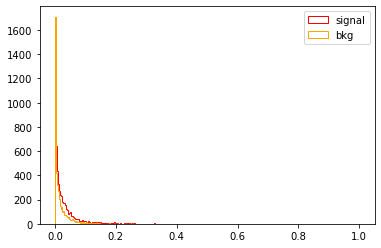

500GeV
lepton3_pt


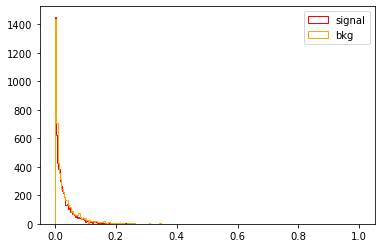

500GeV
lepton1_eta


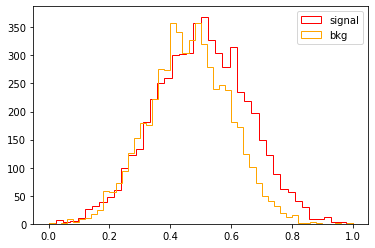

500GeV
lepton2_eta


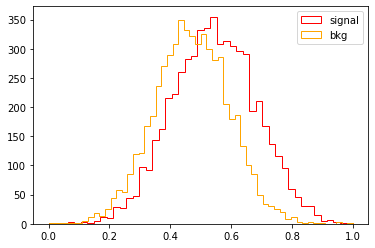

500GeV
lepton3_eta


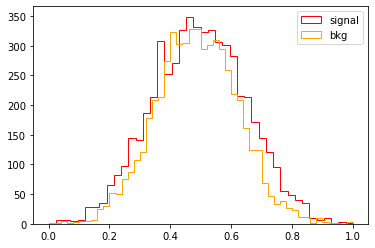

500GeV
lepton1_phi


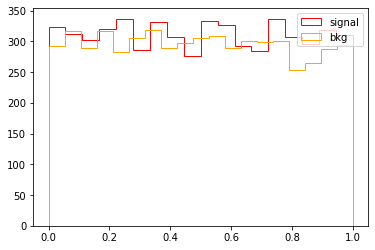

500GeV
lepton2_phi


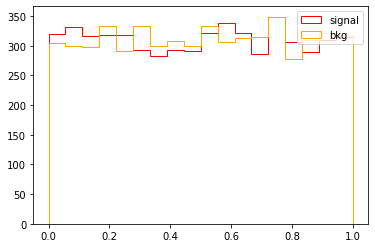

500GeV
lepton3_phi


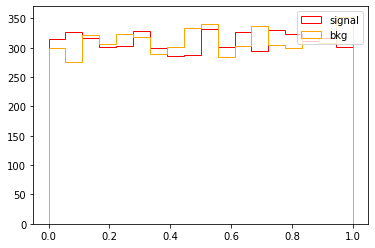

500GeV
MET


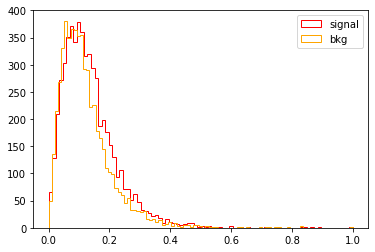

500GeV
MET_phi


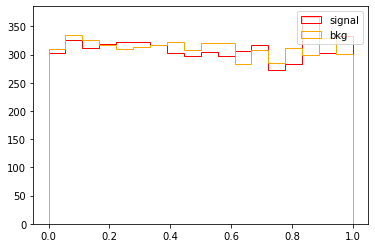

500GeV
lepton1_flavor


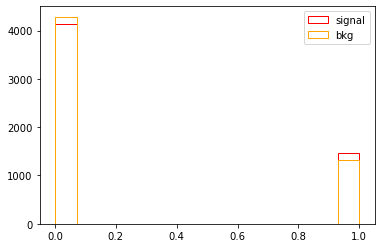

500GeV
lepton2_flavor


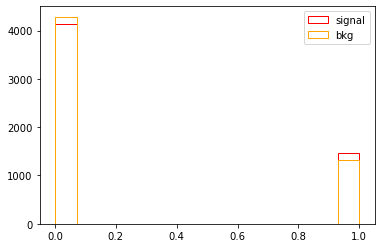

500GeV
lepton3_flavor


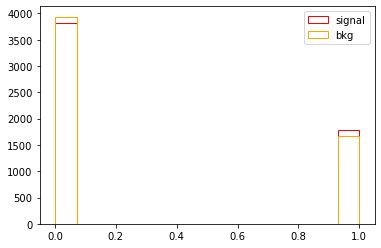

500GeV
lepton1_charge


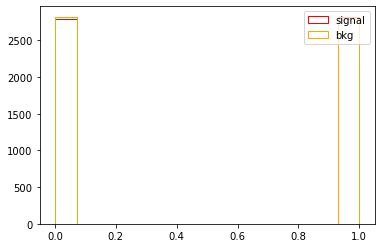

500GeV
lepton2_charge


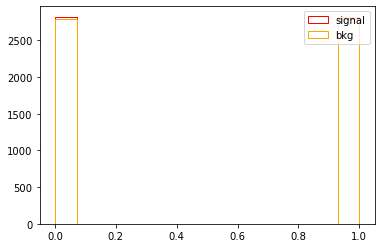

500GeV
lepton3_charge


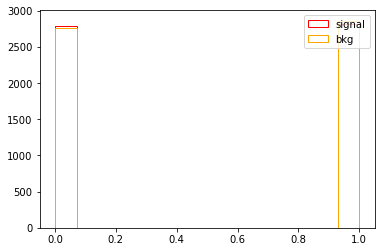

500GeV
visible_pt


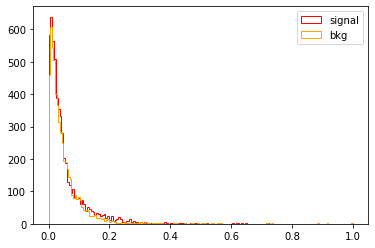

500GeV
transverse_mass


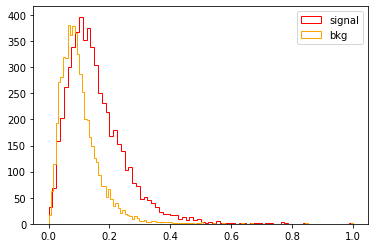

500GeV
dilep_mass


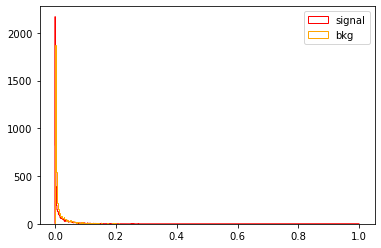

500GeV
dilep_DR


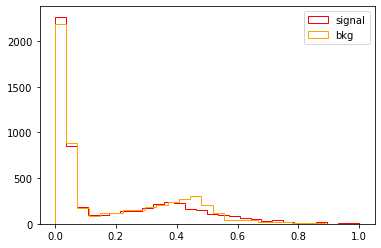

500GeV
signal


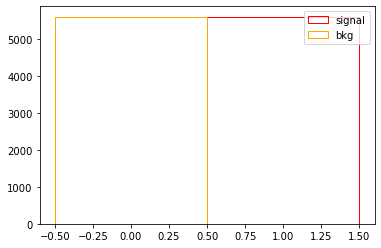

600GeV
lepton1_pt


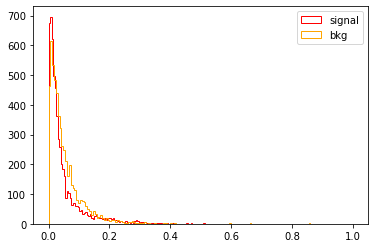

600GeV
lepton2_pt


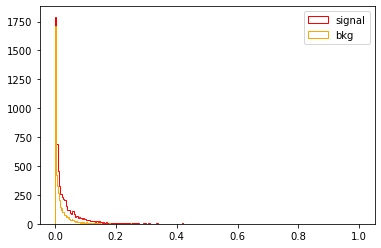

600GeV
lepton3_pt


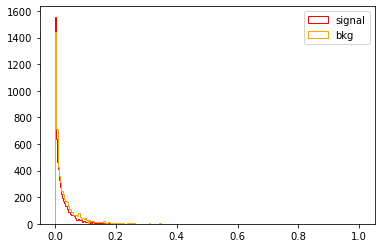

600GeV
lepton1_eta


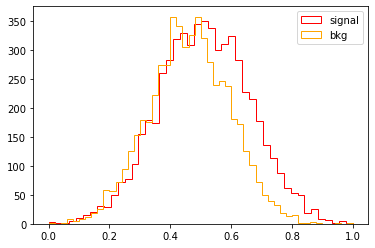

600GeV
lepton2_eta


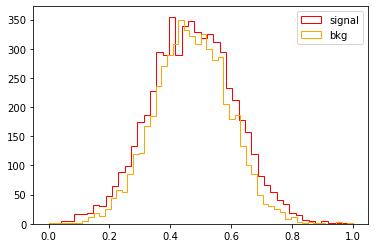

600GeV
lepton3_eta


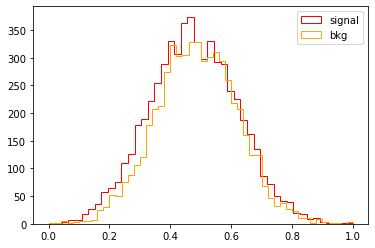

600GeV
lepton1_phi


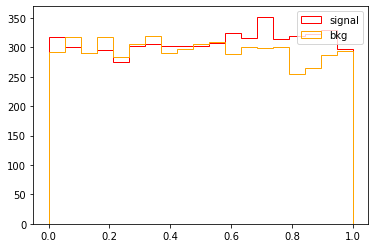

600GeV
lepton2_phi


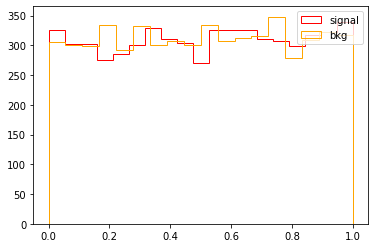

600GeV
lepton3_phi


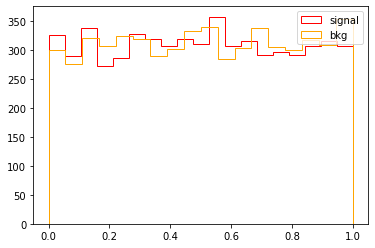

600GeV
MET


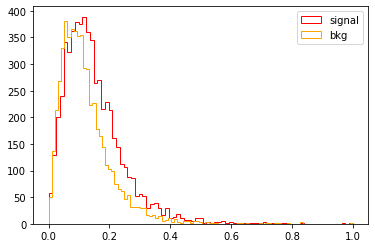

600GeV
MET_phi


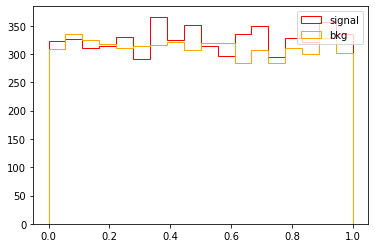

600GeV
lepton1_flavor


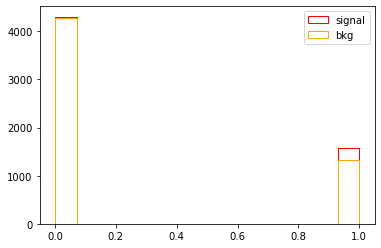

600GeV
lepton2_flavor


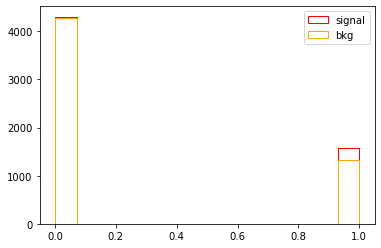

600GeV
lepton3_flavor


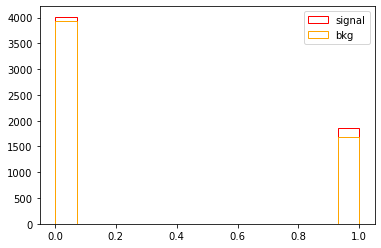

600GeV
lepton1_charge


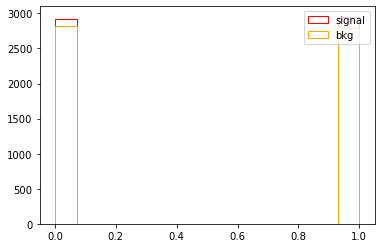

600GeV
lepton2_charge


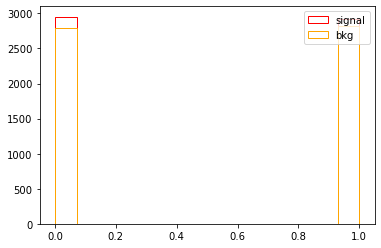

600GeV
lepton3_charge


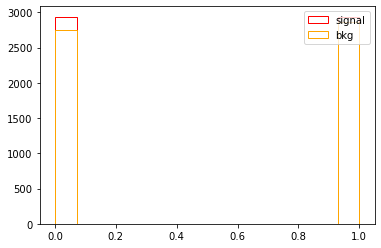

600GeV
visible_pt


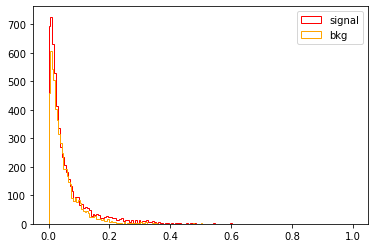

600GeV
transverse_mass


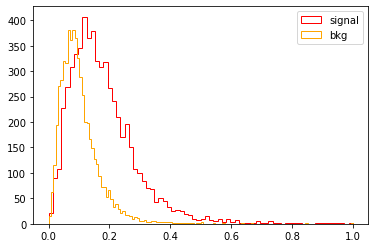

600GeV
dilep_mass


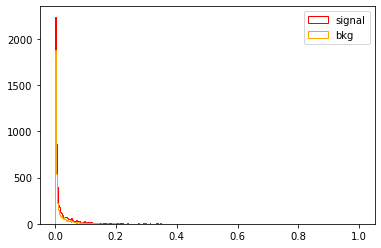

600GeV
dilep_DR


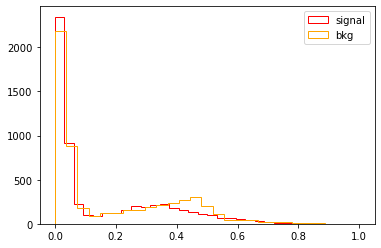

600GeV
signal


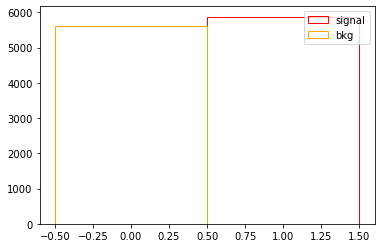

700GeV
lepton1_pt


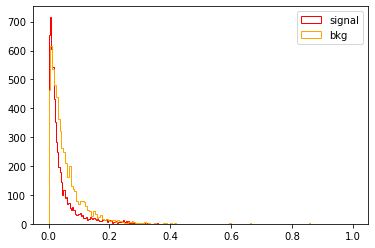

700GeV
lepton2_pt


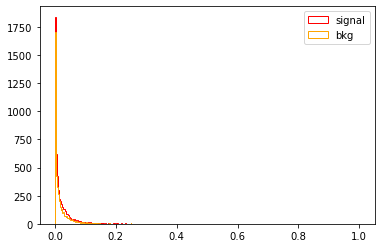

700GeV
lepton3_pt


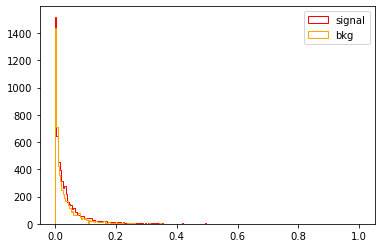

700GeV
lepton1_eta


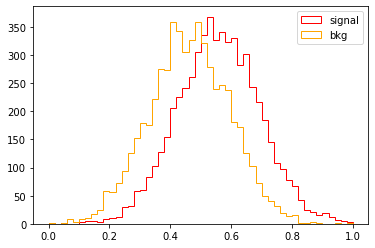

700GeV
lepton2_eta


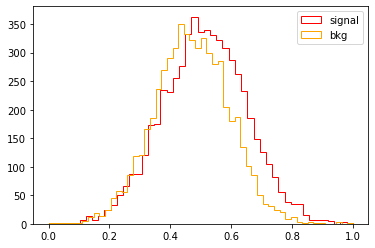

700GeV
lepton3_eta


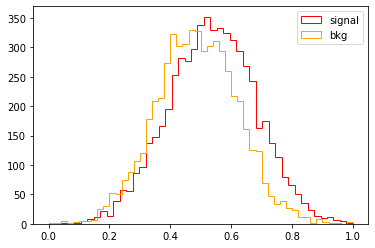

700GeV
lepton1_phi


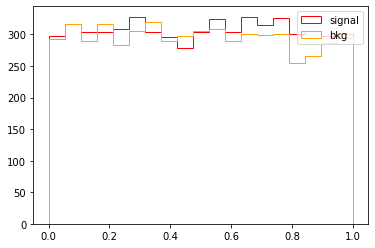

700GeV
lepton2_phi


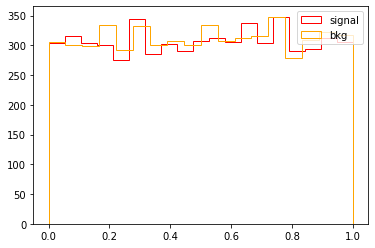

700GeV
lepton3_phi


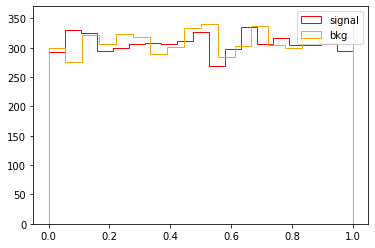

700GeV
MET


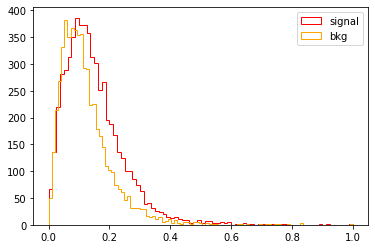

700GeV
MET_phi


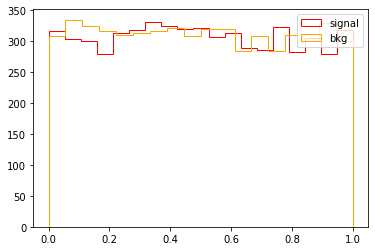

700GeV
lepton1_flavor


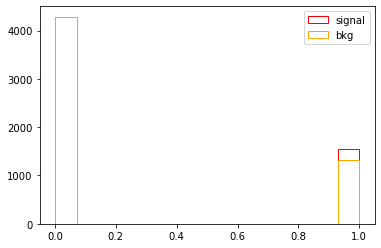

700GeV
lepton2_flavor


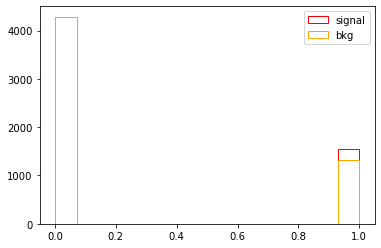

700GeV
lepton3_flavor


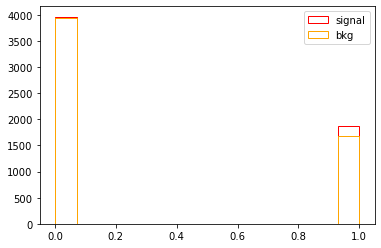

700GeV
lepton1_charge


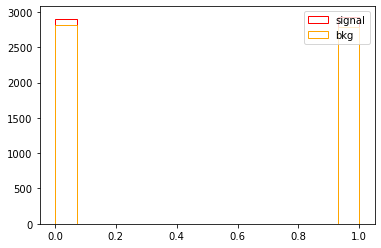

700GeV
lepton2_charge


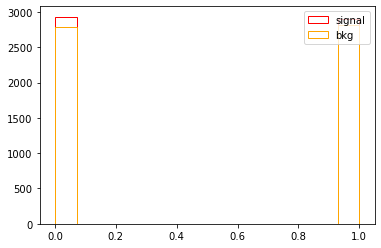

700GeV
lepton3_charge


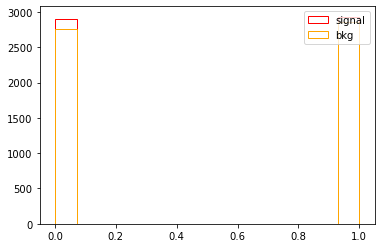

700GeV
visible_pt


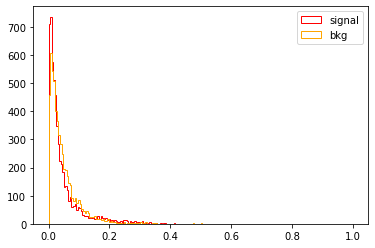

700GeV
transverse_mass


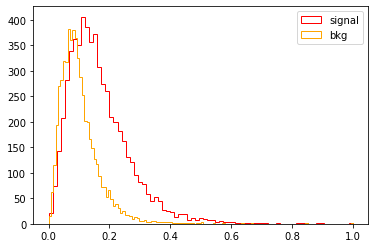

700GeV
dilep_mass


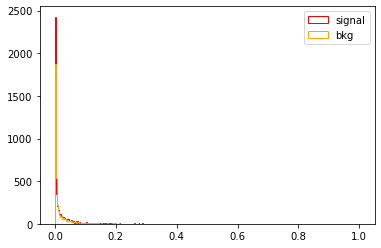

700GeV
dilep_DR


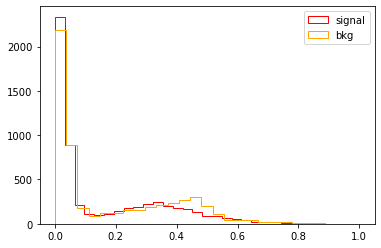

700GeV
signal


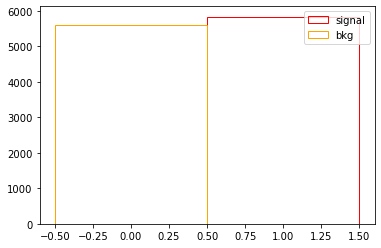

800GeV
lepton1_pt


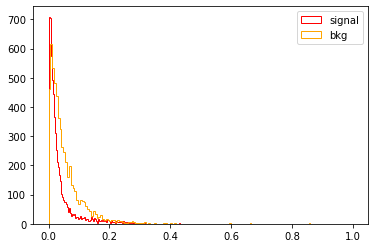

800GeV
lepton2_pt


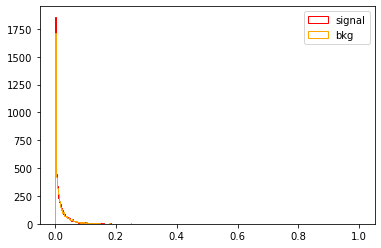

800GeV
lepton3_pt


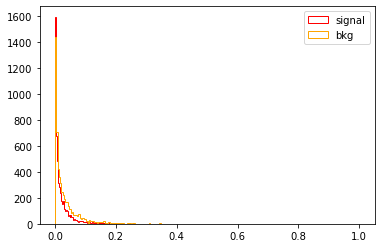

800GeV
lepton1_eta


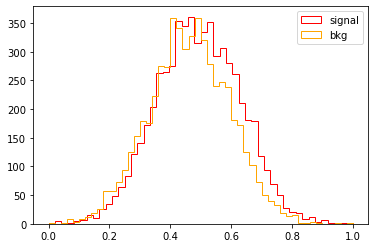

800GeV
lepton2_eta


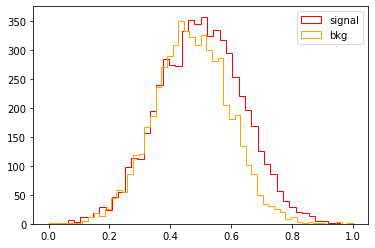

800GeV
lepton3_eta


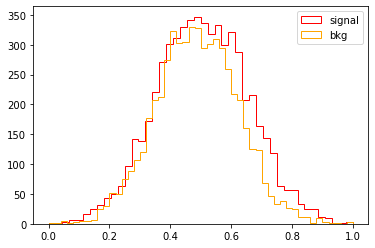

800GeV
lepton1_phi


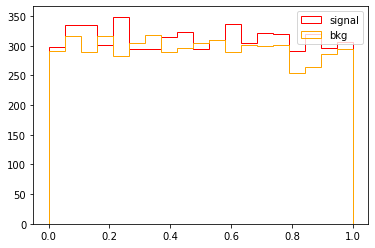

800GeV
lepton2_phi


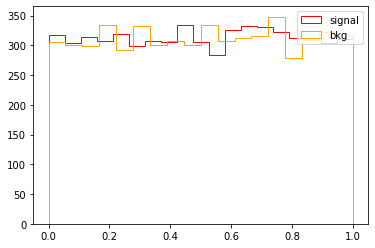

800GeV
lepton3_phi


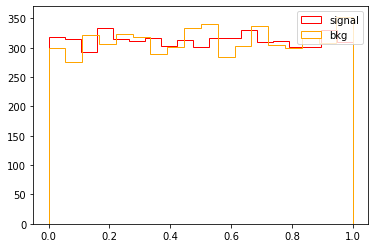

800GeV
MET


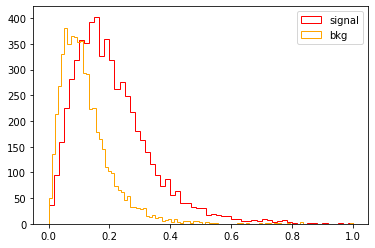

800GeV
MET_phi


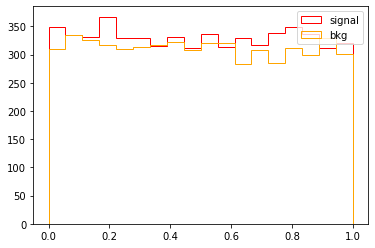

800GeV
lepton1_flavor


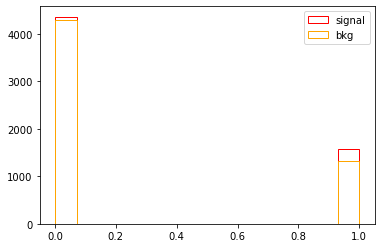

800GeV
lepton2_flavor


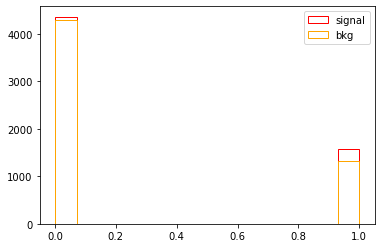

800GeV
lepton3_flavor


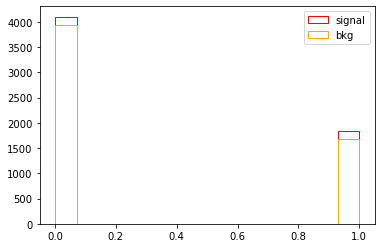

800GeV
lepton1_charge


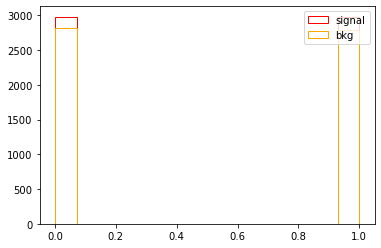

800GeV
lepton2_charge


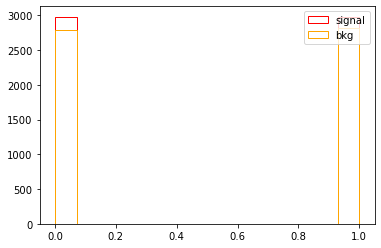

800GeV
lepton3_charge


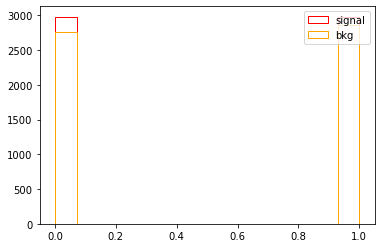

800GeV
visible_pt


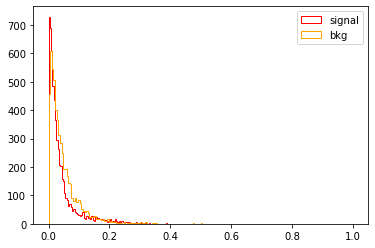

800GeV
transverse_mass


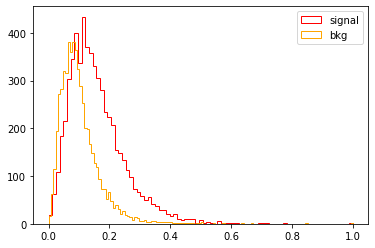

800GeV
dilep_mass


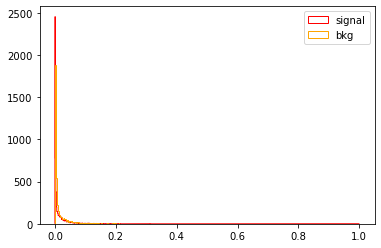

800GeV
dilep_DR


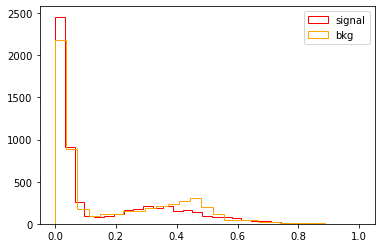

800GeV
signal


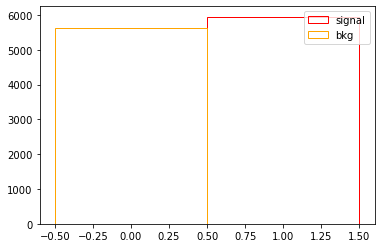

1000GeV
lepton1_pt


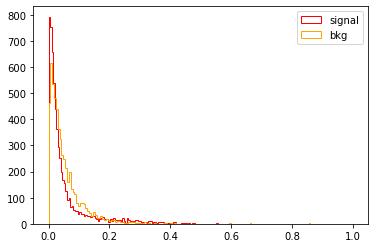

1000GeV
lepton2_pt


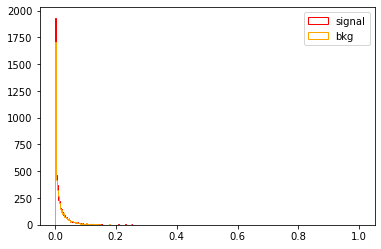

1000GeV
lepton3_pt


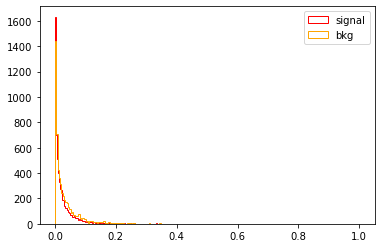

1000GeV
lepton1_eta


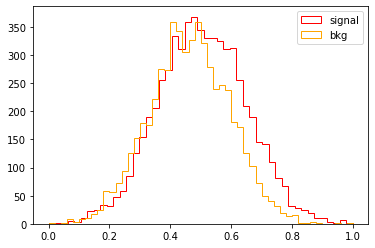

1000GeV
lepton2_eta


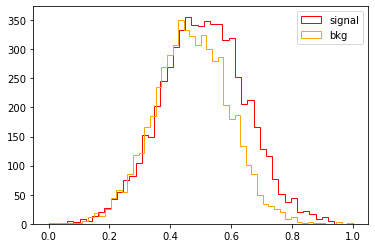

1000GeV
lepton3_eta


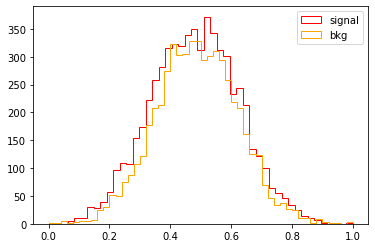

1000GeV
lepton1_phi


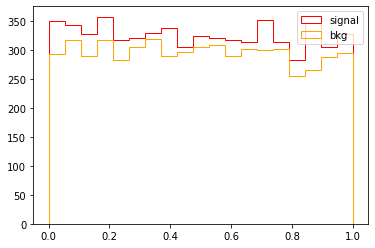

1000GeV
lepton2_phi


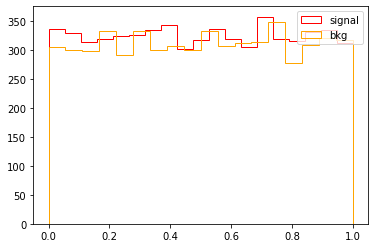

1000GeV
lepton3_phi


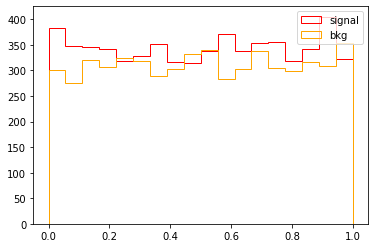

1000GeV
MET


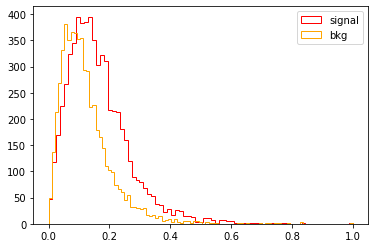

1000GeV
MET_phi


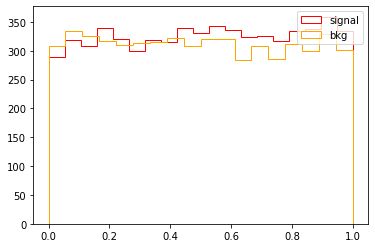

1000GeV
lepton1_flavor


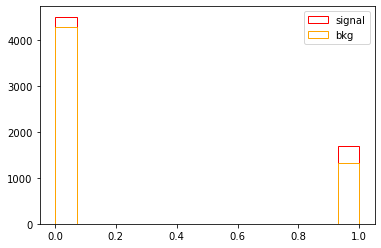

1000GeV
lepton2_flavor


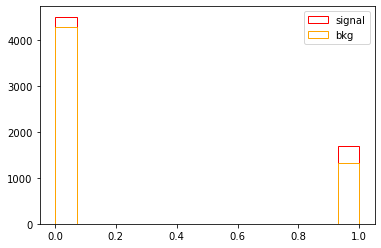

1000GeV
lepton3_flavor


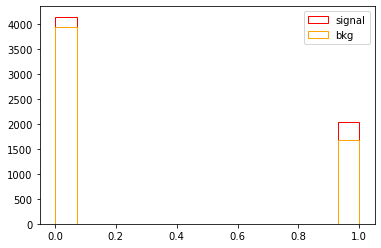

1000GeV
lepton1_charge


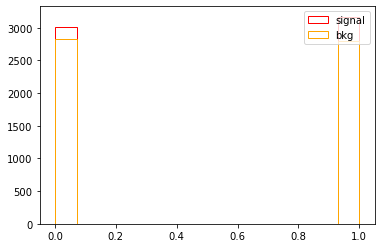

1000GeV
lepton2_charge


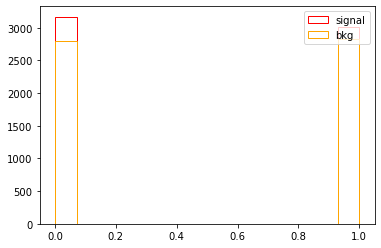

1000GeV
lepton3_charge


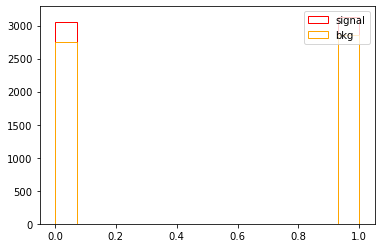

1000GeV
visible_pt


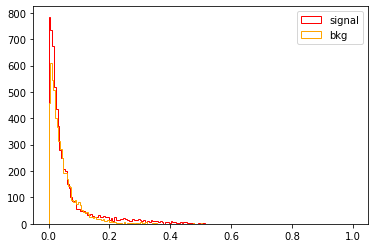

1000GeV
transverse_mass


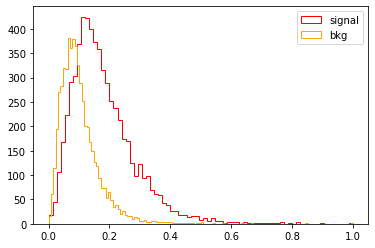

1000GeV
dilep_mass


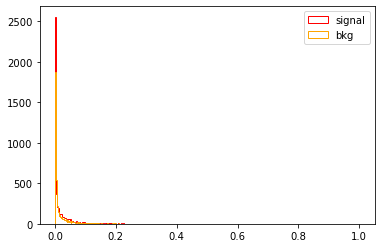

1000GeV
dilep_DR


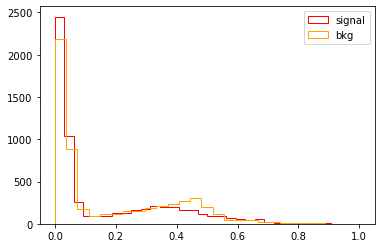

1000GeV
signal


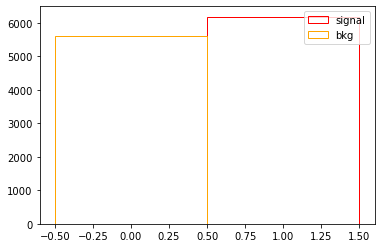

In [28]:
#Plot 80% of new df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[:n_sig[sig]][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[:n_bkg][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

500GeV
lepton1_pt


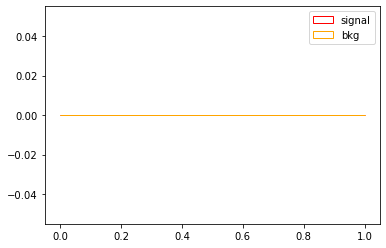

500GeV
lepton2_pt


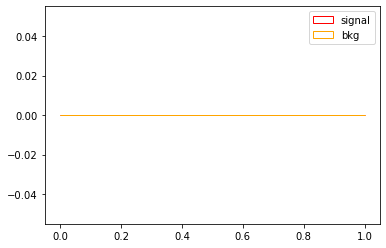

500GeV
lepton3_pt


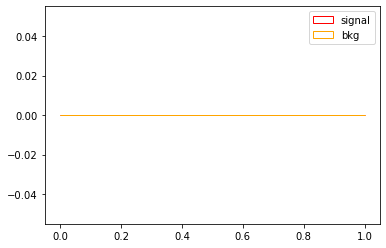

500GeV
lepton1_eta


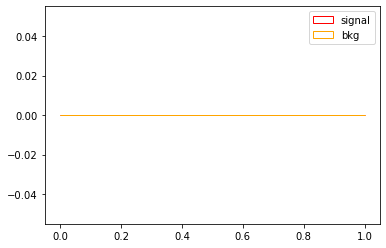

500GeV
lepton2_eta


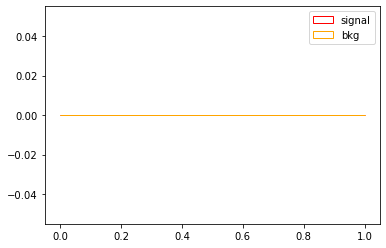

500GeV
lepton3_eta


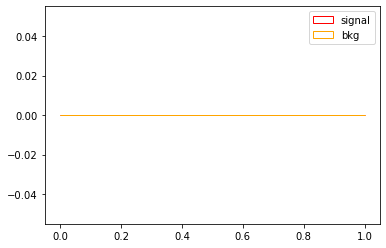

500GeV
lepton1_phi


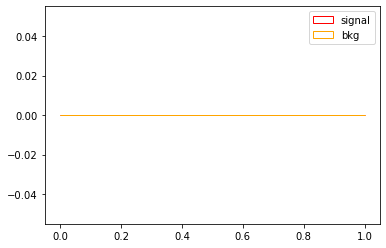

500GeV
lepton2_phi


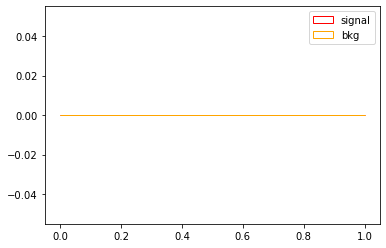

500GeV
lepton3_phi


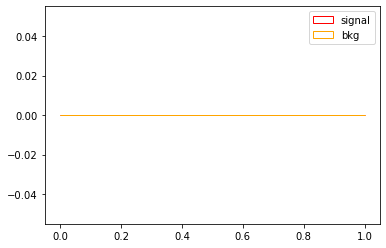

500GeV
MET


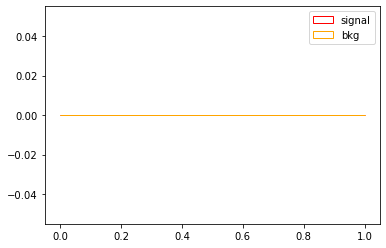

500GeV
MET_phi


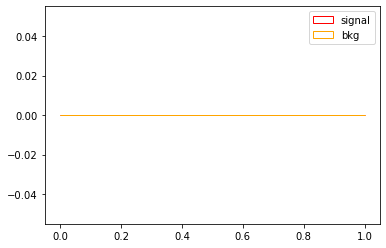

500GeV
lepton1_flavor


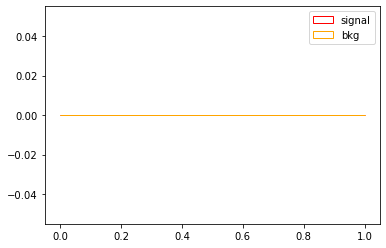

500GeV
lepton2_flavor


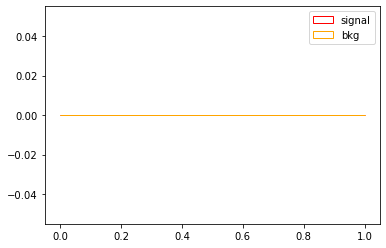

500GeV
lepton3_flavor


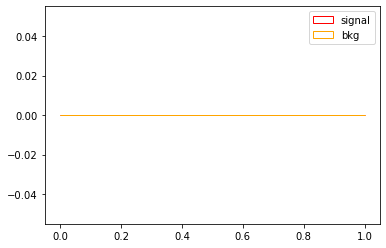

500GeV
lepton1_charge


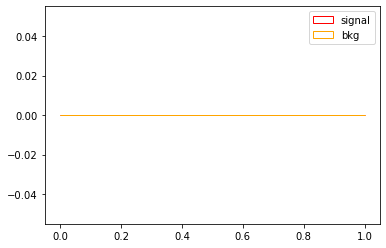

500GeV
lepton2_charge


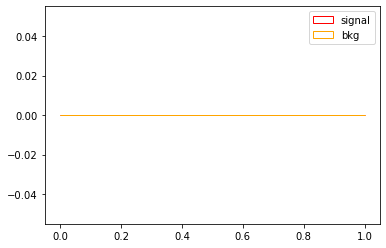

500GeV
lepton3_charge


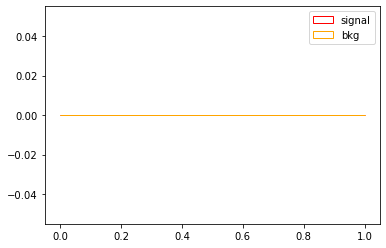

500GeV
visible_pt


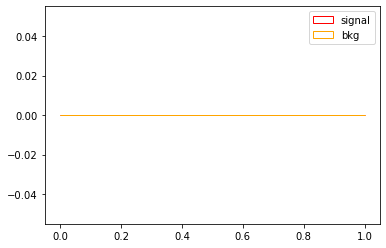

500GeV
transverse_mass


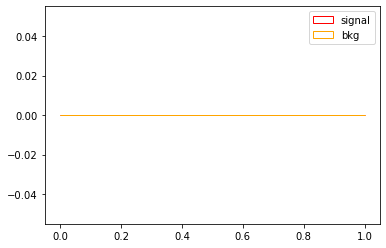

500GeV
dilep_mass


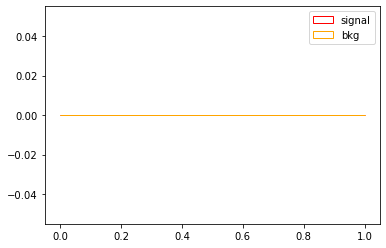

500GeV
dilep_DR


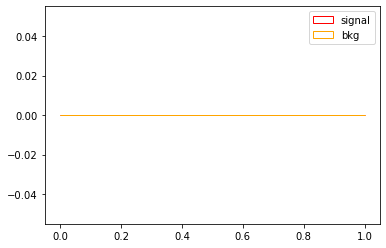

500GeV
signal


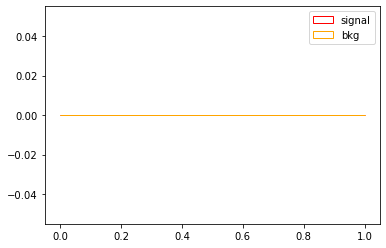

600GeV
lepton1_pt


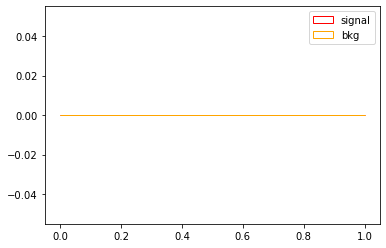

600GeV
lepton2_pt


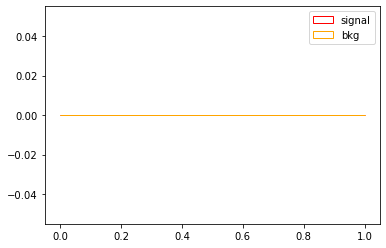

600GeV
lepton3_pt


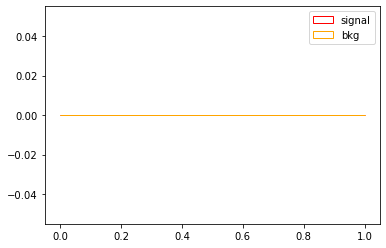

600GeV
lepton1_eta


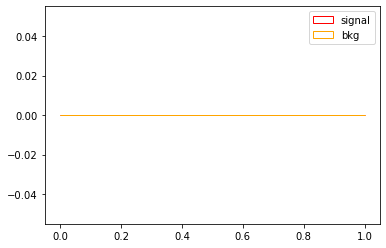

600GeV
lepton2_eta


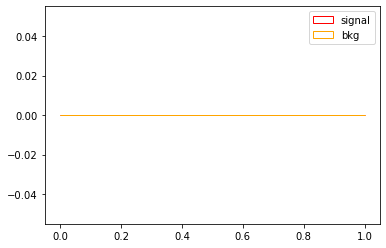

600GeV
lepton3_eta


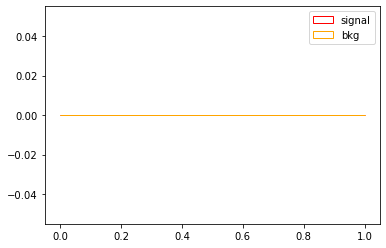

600GeV
lepton1_phi


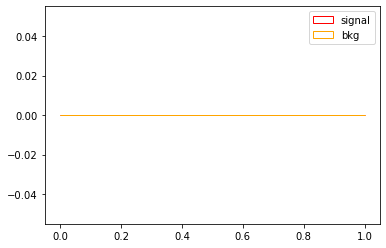

600GeV
lepton2_phi


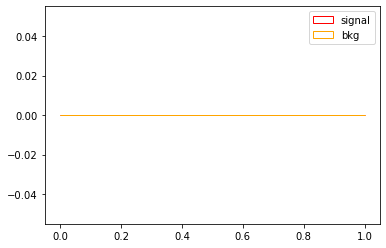

600GeV
lepton3_phi


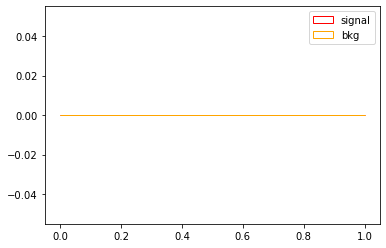

600GeV
MET


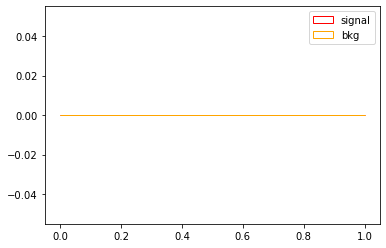

600GeV
MET_phi


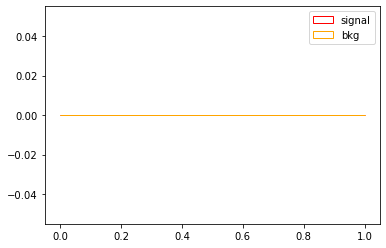

600GeV
lepton1_flavor


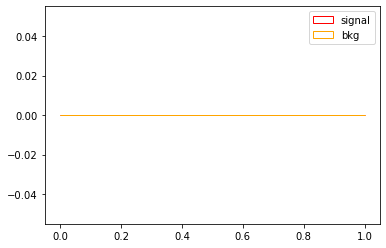

600GeV
lepton2_flavor


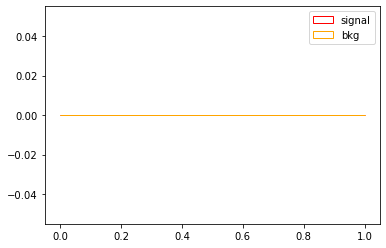

600GeV
lepton3_flavor


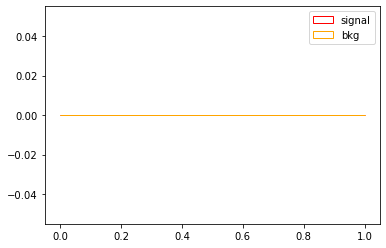

600GeV
lepton1_charge


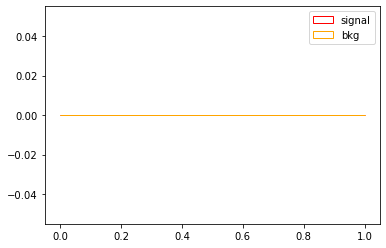

600GeV
lepton2_charge


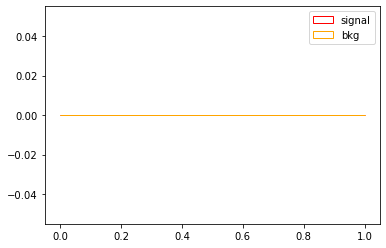

600GeV
lepton3_charge


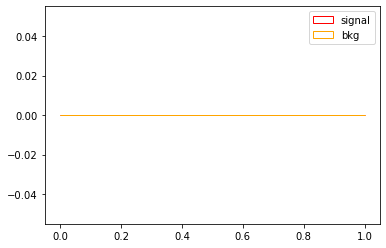

600GeV
visible_pt


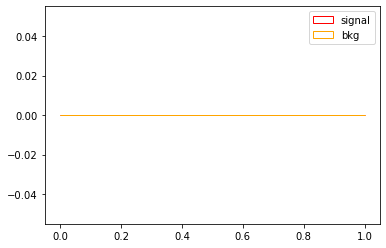

600GeV
transverse_mass


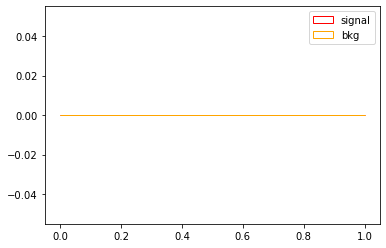

600GeV
dilep_mass


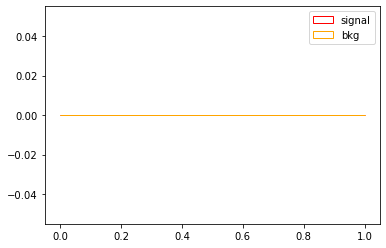

600GeV
dilep_DR


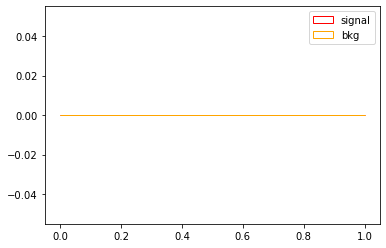

600GeV
signal


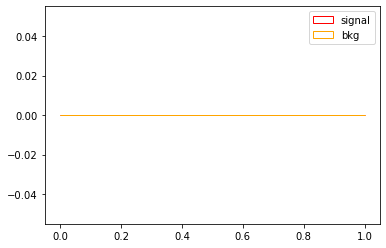

700GeV
lepton1_pt


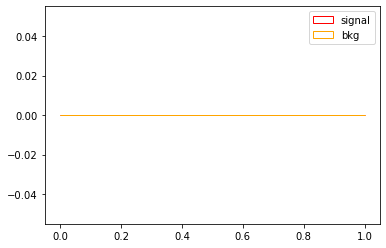

700GeV
lepton2_pt


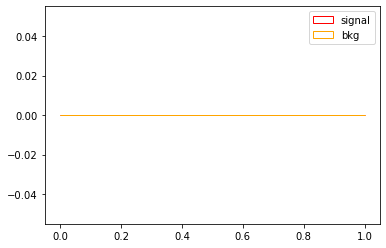

700GeV
lepton3_pt


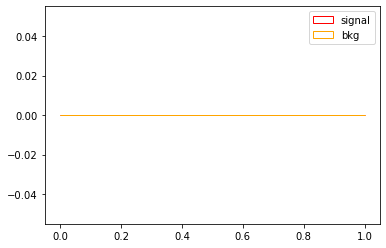

700GeV
lepton1_eta


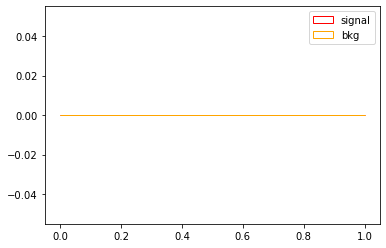

700GeV
lepton2_eta


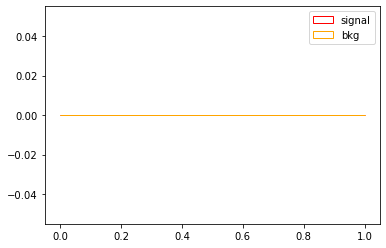

700GeV
lepton3_eta


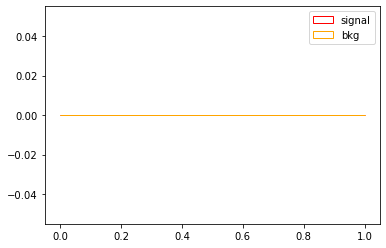

700GeV
lepton1_phi


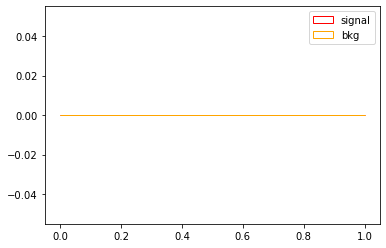

700GeV
lepton2_phi


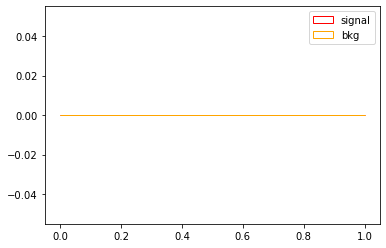

700GeV
lepton3_phi


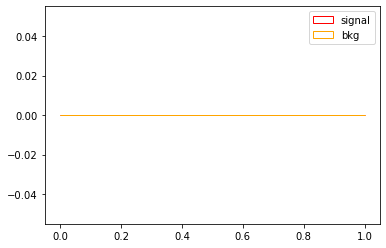

700GeV
MET


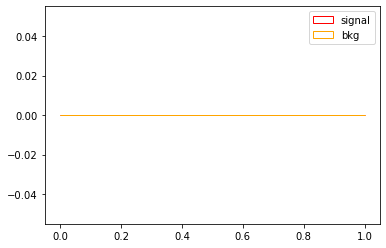

700GeV
MET_phi


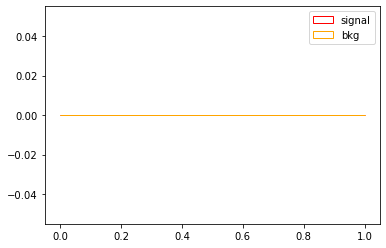

700GeV
lepton1_flavor


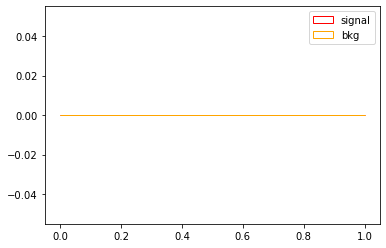

700GeV
lepton2_flavor


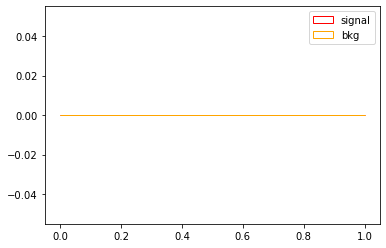

700GeV
lepton3_flavor


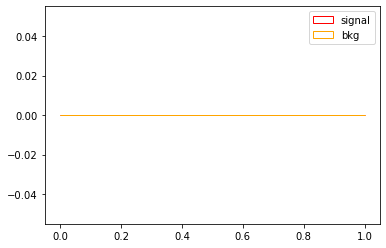

700GeV
lepton1_charge


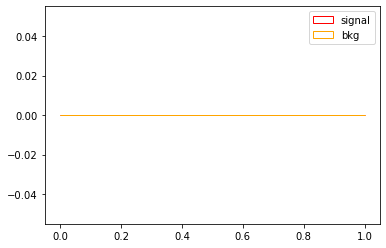

700GeV
lepton2_charge


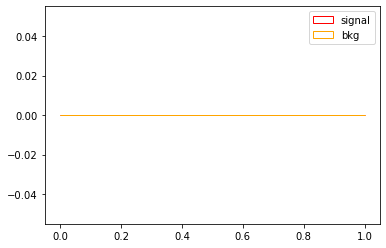

700GeV
lepton3_charge


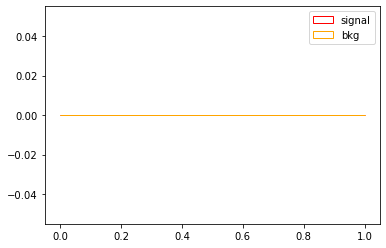

700GeV
visible_pt


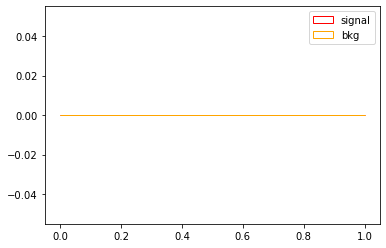

700GeV
transverse_mass


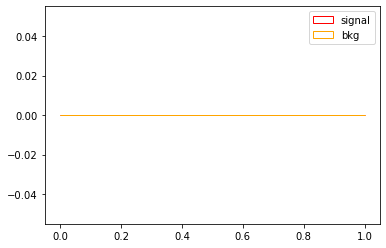

700GeV
dilep_mass


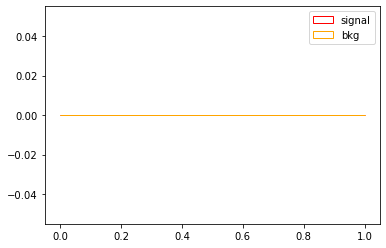

700GeV
dilep_DR


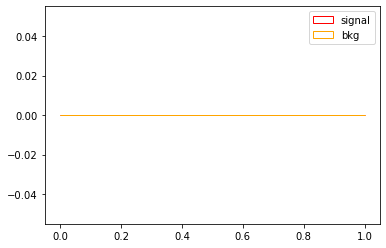

700GeV
signal


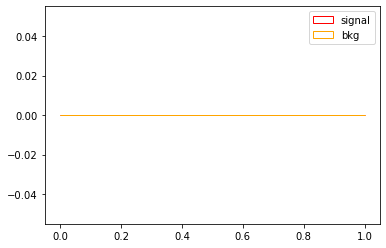

800GeV
lepton1_pt


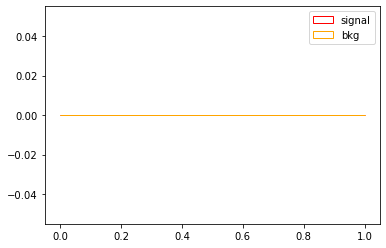

800GeV
lepton2_pt


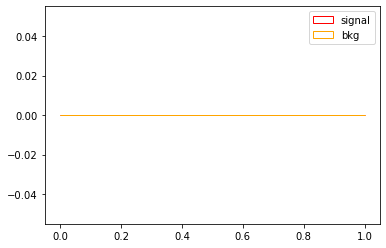

800GeV
lepton3_pt


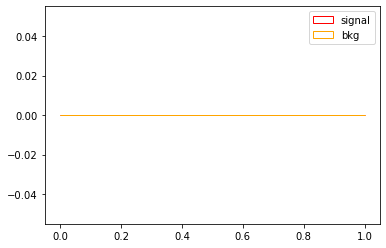

800GeV
lepton1_eta


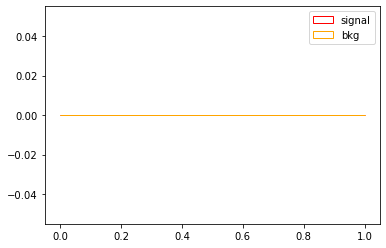

800GeV
lepton2_eta


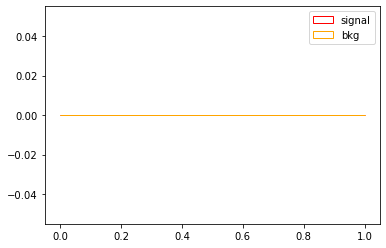

800GeV
lepton3_eta


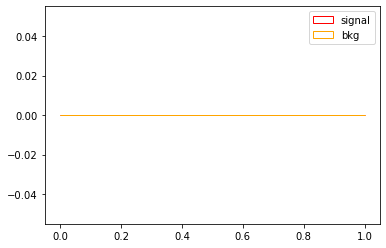

800GeV
lepton1_phi


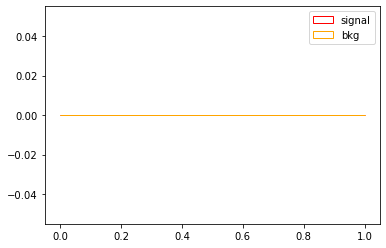

800GeV
lepton2_phi


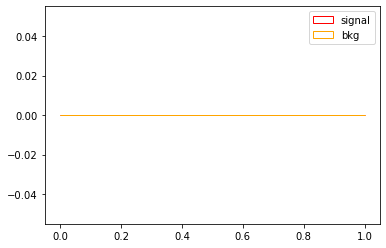

800GeV
lepton3_phi


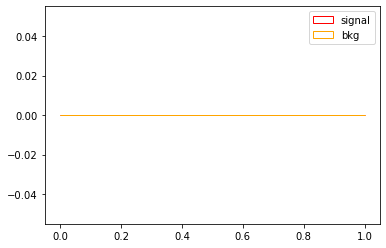

800GeV
MET


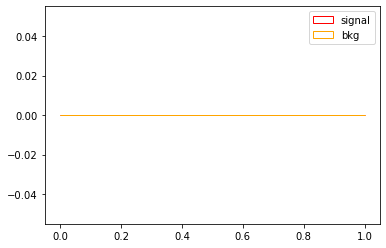

800GeV
MET_phi


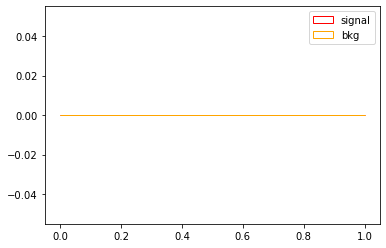

800GeV
lepton1_flavor


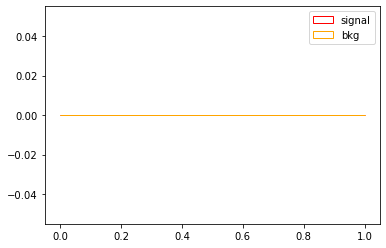

800GeV
lepton2_flavor


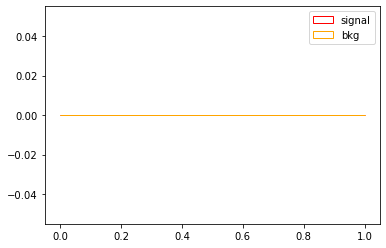

800GeV
lepton3_flavor


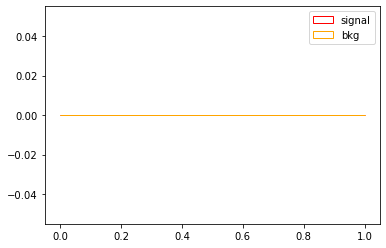

800GeV
lepton1_charge


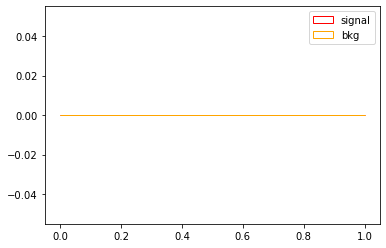

800GeV
lepton2_charge


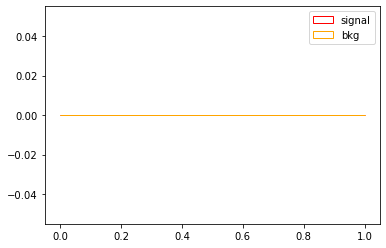

800GeV
lepton3_charge


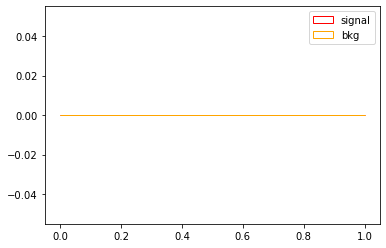

800GeV
visible_pt


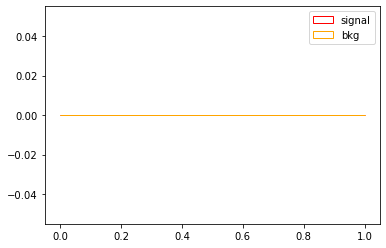

800GeV
transverse_mass


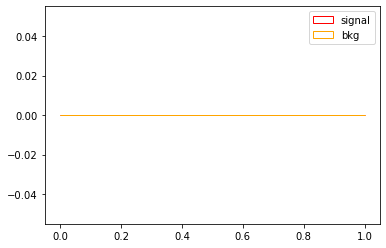

800GeV
dilep_mass


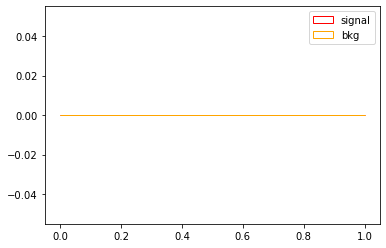

800GeV
dilep_DR


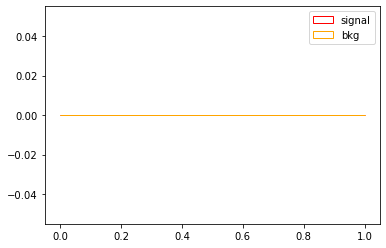

800GeV
signal


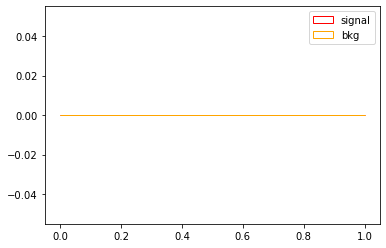

1000GeV
lepton1_pt


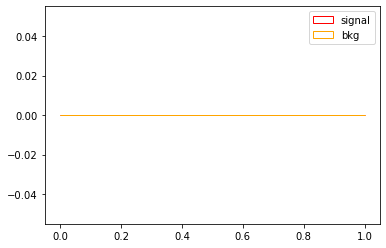

1000GeV
lepton2_pt


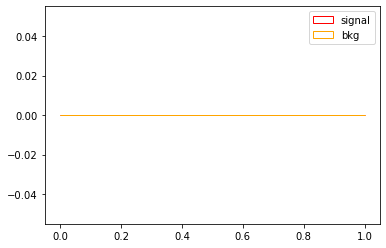

1000GeV
lepton3_pt


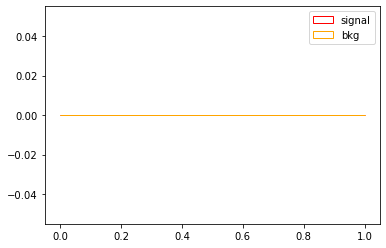

1000GeV
lepton1_eta


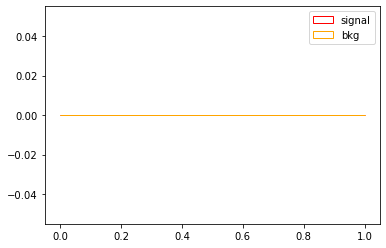

1000GeV
lepton2_eta


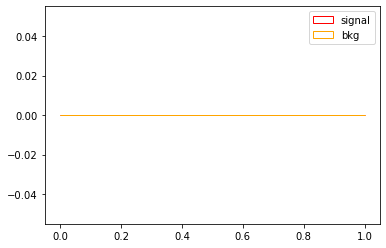

1000GeV
lepton3_eta


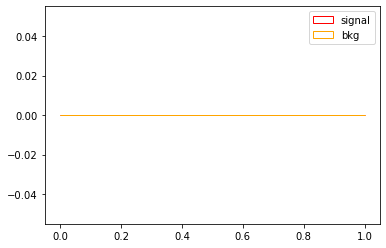

1000GeV
lepton1_phi


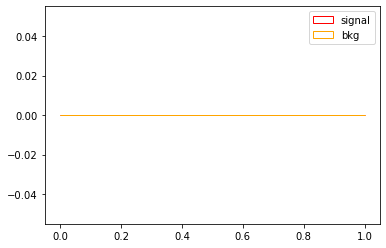

1000GeV
lepton2_phi


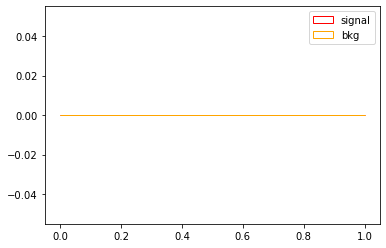

1000GeV
lepton3_phi


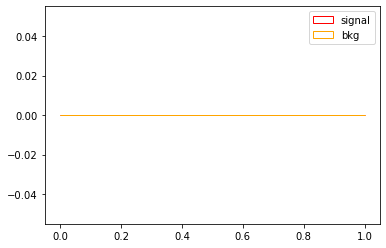

1000GeV
MET


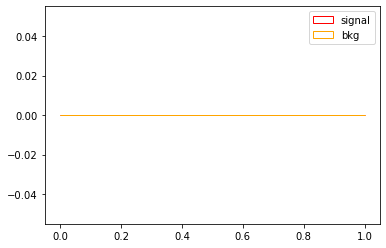

1000GeV
MET_phi


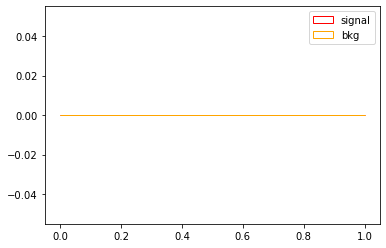

1000GeV
lepton1_flavor


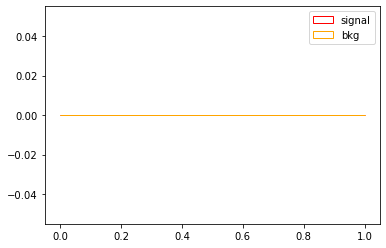

1000GeV
lepton2_flavor


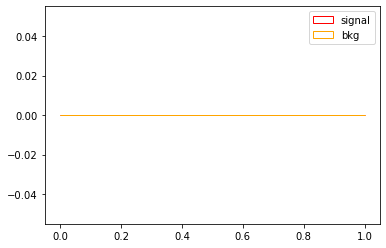

1000GeV
lepton3_flavor


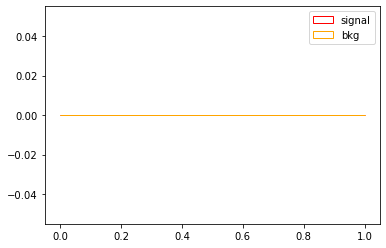

1000GeV
lepton1_charge


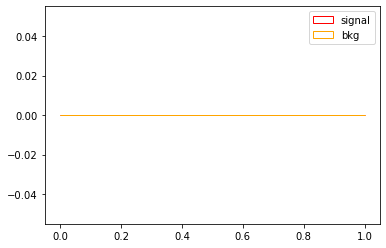

1000GeV
lepton2_charge


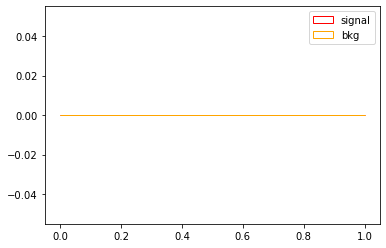

1000GeV
lepton3_charge


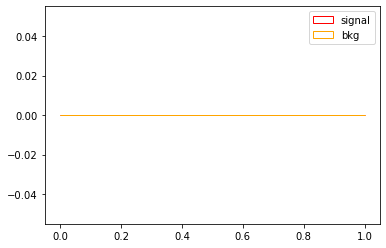

1000GeV
visible_pt


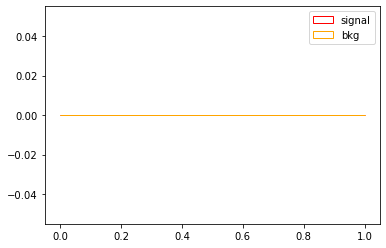

1000GeV
transverse_mass


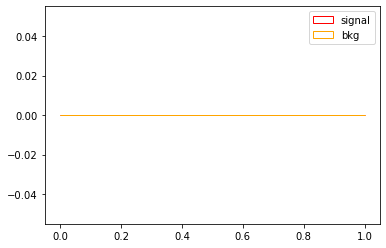

1000GeV
dilep_mass


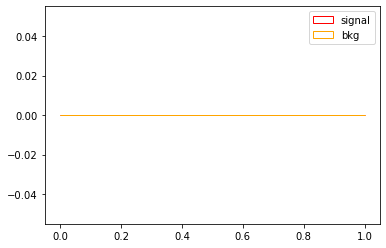

1000GeV
dilep_DR


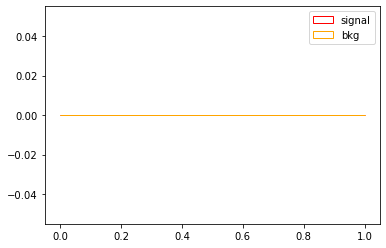

1000GeV
signal


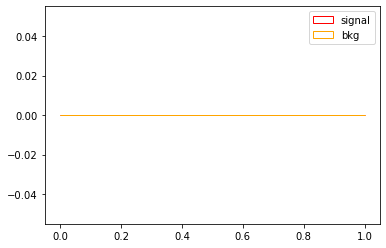

In [29]:
#Plot other 20% of df_train set
for sig in range(len(df_train)):
    for var in df_train[sig].columns:
        print (mass_points[sig])
        print (var)
        plt.figure()
        plt.hist(df_norm_sig[sig].iloc[n_sig[sig]:][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg.iloc[n_bkg:][var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [30]:
for sig in range(len(x_train)):
    print (mass_points[sig])
    print (np.shape(x_train[sig]))
    print (np.shape(y_test[sig]))

500GeV
(11216, 17)
(0,)
600GeV
(11490, 17)
(0,)
700GeV
(11451, 17)
(0,)
800GeV
(11563, 17)
(0,)
1000GeV
(11802, 17)
(0,)


In [31]:
x_train[0]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.020033,0.025984,0.027653,0.525892,0.681293,0.495445,0.381575,0.365318,0.343106,0.032247,0.773872,0.0,0.0,1.0,1.0,0.0,0.0
1,0.011758,0.000032,0.009652,0.408367,0.539673,0.580148,0.354173,0.570929,0.519812,0.128686,0.707685,0.0,0.0,0.0,1.0,0.0,1.0
2,0.004002,0.001010,0.004479,0.659901,0.676732,0.669521,0.945433,0.954161,0.931037,0.086111,0.802752,0.0,0.0,0.0,0.0,1.0,0.0
3,0.024705,0.033431,0.063194,0.520598,0.228962,0.264273,0.670349,0.494108,0.498186,0.127245,0.235188,1.0,1.0,1.0,1.0,0.0,1.0
4,0.116945,0.007540,0.086094,0.604788,0.574276,0.573942,0.473693,0.476419,0.983840,0.136725,0.293019,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11211,0.121464,0.032085,0.054198,0.472813,0.677623,0.635796,0.555630,0.429988,0.433518,0.062655,0.942422,0.0,0.0,1.0,0.0,1.0,0.0
11212,0.025279,0.014668,0.000514,0.229420,0.289783,0.370027,0.175900,0.164248,0.471763,0.095479,0.662914,1.0,1.0,0.0,1.0,0.0,1.0
11213,0.048324,0.090654,0.059270,0.437653,0.493882,0.733031,0.081474,0.075623,0.993196,0.051159,0.842213,1.0,1.0,0.0,0.0,1.0,1.0
11214,0.141665,0.061601,0.098224,0.639440,0.655351,0.424555,0.246040,0.244750,0.406984,0.148411,0.866276,1.0,1.0,1.0,1.0,0.0,0.0


In [32]:
x_train[1]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.016116,0.034716,0.032110,0.544241,0.361037,0.344072,0.503301,0.724066,0.769524,0.020724,0.083809,0.0,0.0,1.0,0.0,1.0,0.0
1,0.001618,0.000226,0.000647,0.223253,0.210781,0.230845,0.991500,0.973633,0.975774,0.147039,0.855332,0.0,0.0,0.0,1.0,0.0,1.0
2,0.003683,0.002545,0.006200,0.454687,0.457303,0.514963,0.001122,0.990381,0.219950,0.209578,0.493457,0.0,0.0,0.0,0.0,1.0,0.0
3,0.026881,0.000202,0.000041,0.441445,0.455324,0.468875,0.318248,0.300792,0.307138,0.107371,0.182696,0.0,0.0,0.0,1.0,0.0,1.0
4,0.007274,0.019758,0.013067,0.610816,0.288566,0.336722,0.265958,0.655304,0.673973,0.145618,0.280916,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11485,0.053393,0.019435,0.136686,0.401154,0.567173,0.583185,0.134374,0.574835,0.600754,0.068247,0.743481,0.0,0.0,1.0,1.0,0.0,1.0
11486,0.018621,0.006182,0.001947,0.379025,0.827449,0.829755,0.724479,0.872232,0.872090,0.136509,0.734084,0.0,0.0,0.0,1.0,0.0,1.0
11487,0.021303,0.026907,0.027985,0.487153,0.402185,0.417206,0.316775,0.145832,0.145633,0.074119,0.037420,0.0,0.0,0.0,0.0,1.0,0.0
11488,0.256838,0.335344,0.064502,0.389869,0.351495,0.640605,0.022591,0.057251,0.411798,0.337817,0.523632,1.0,1.0,1.0,1.0,0.0,0.0


In [33]:
x_train[2]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.048709,0.004136,0.000191,0.498555,0.628529,0.647218,0.793791,0.641744,0.639152,0.103265,0.138505,0.0,0.0,0.0,0.0,1.0,0.0
1,0.012435,0.000174,0.007245,0.548949,0.727840,0.749203,0.262166,0.270370,0.268009,0.176785,0.666275,0.0,0.0,0.0,1.0,0.0,1.0
2,0.006044,0.001794,0.013814,0.592783,0.584701,0.590713,0.451623,0.452681,0.299327,0.033918,0.284895,0.0,0.0,0.0,1.0,0.0,0.0
3,0.028353,0.019594,0.063947,0.494599,0.407356,0.226461,0.693904,0.691335,0.186948,0.036246,0.324744,1.0,1.0,1.0,1.0,0.0,1.0
4,0.013148,0.006542,0.015185,0.575259,0.313656,0.261387,0.400125,0.545629,0.855870,0.083306,0.417257,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11446,0.094326,0.011795,0.011108,0.472934,0.446592,0.461409,0.626788,0.608686,0.618549,0.210690,0.236890,1.0,1.0,0.0,0.0,1.0,0.0
11447,0.025107,0.003433,0.001062,0.735226,0.672564,0.252188,0.762287,0.721847,0.619373,0.102790,0.882066,1.0,1.0,0.0,0.0,1.0,0.0
11448,0.233917,0.023929,0.009118,0.470553,0.452955,0.488595,0.858409,0.868354,0.820900,0.049147,0.176900,0.0,0.0,0.0,1.0,0.0,1.0
11449,0.254985,0.040678,0.195557,0.652465,0.476307,0.502502,0.706823,0.694586,0.694238,0.145747,0.261392,0.0,0.0,1.0,1.0,0.0,1.0


In [34]:
x_train[3]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.013839,0.000096,0.038981,0.711255,0.697426,0.718223,0.133811,0.102922,0.149965,0.224571,0.595988,0.0,0.0,1.0,1.0,0.0,0.0
1,0.002441,0.001566,0.001067,0.610504,0.601383,0.650121,0.080592,0.081197,0.148678,0.100386,0.915892,0.0,0.0,0.0,0.0,1.0,0.0
2,0.120792,0.032385,0.215644,0.530364,0.465551,0.501462,0.321697,0.584404,0.566764,0.033503,0.652921,0.0,0.0,1.0,1.0,0.0,1.0
3,0.004938,0.011472,0.006347,0.469941,0.470281,0.476592,0.031311,0.027312,0.027562,0.232020,0.923126,0.0,0.0,0.0,0.0,1.0,0.0
4,0.029346,0.013794,0.013604,0.431050,0.733521,0.451209,0.826120,0.742363,0.816896,0.090076,0.442225,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11558,0.018958,0.015594,0.006112,0.339363,0.752911,0.353396,0.668800,0.387691,0.641057,0.153208,0.339808,1.0,1.0,0.0,1.0,0.0,0.0
11559,0.056652,0.091194,0.112748,0.410558,0.418913,0.435864,0.643303,0.633504,0.646862,0.050360,0.718545,1.0,1.0,0.0,0.0,1.0,0.0
11560,0.028374,0.001574,0.022845,0.578037,0.557533,0.578877,0.100481,0.205650,0.205852,0.131030,0.657201,0.0,0.0,0.0,1.0,0.0,1.0
11561,0.013305,0.007174,0.012855,0.492233,0.516417,0.290478,0.461198,0.480506,0.591584,0.148595,0.801540,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
x_train[4]

,lepton1_pt,lepton2_pt,lepton3_pt,lepton1_eta,lepton2_eta,lepton3_eta,lepton1_phi,lepton2_phi,lepton3_phi,MET,MET_phi,lepton1_flavor,lepton2_flavor,lepton3_flavor,lepton1_charge,lepton2_charge,lepton3_charge
0,0.024883,0.014566,0.006207,0.403226,0.573202,0.543300,0.270084,0.654053,0.654050,0.155727,0.236962,0.0,0.0,0.0,1.0,0.0,1.0
1,0.035410,0.042902,0.000504,0.504814,0.627950,0.607651,0.862813,0.003441,0.043655,0.040858,0.799828,1.0,1.0,1.0,0.0,1.0,0.0
2,0.042792,0.011652,0.121846,0.521773,0.522818,0.564407,0.786239,0.775517,0.562774,0.122537,0.175728,0.0,0.0,0.0,0.0,1.0,1.0
3,0.014461,0.005479,0.021856,0.251323,0.246912,0.546456,0.286809,0.325206,0.994978,0.134054,0.918639,1.0,1.0,0.0,0.0,1.0,1.0
4,0.044014,0.007544,0.086579,0.627268,0.450496,0.424193,0.065891,0.890578,0.893673,0.141397,0.750643,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11797,0.057729,0.004017,0.008639,0.406293,0.483228,0.461546,0.806974,0.775594,0.842086,0.148854,0.770627,1.0,1.0,0.0,1.0,0.0,0.0
11798,0.091787,0.074937,0.080058,0.423104,0.394622,0.418534,0.091536,0.784432,0.785417,0.188326,0.750754,1.0,1.0,1.0,1.0,0.0,1.0
11799,0.023463,0.041030,0.013832,0.359357,0.568621,0.357429,0.159029,0.155205,0.128810,0.024419,0.112757,1.0,1.0,0.0,1.0,0.0,0.0
11800,0.006241,0.003066,0.005152,0.430691,0.452993,0.799766,0.862397,0.890397,0.478491,0.121546,0.170396,0.0,0.0,1.0,1.0,0.0,0.0


In [36]:
#Running Theano on cpu's ? 
import os 
#print ("Using Queue:", os.environ["SLURM_JOB_PARTITION"])
#gpuid=int(os.environ["SLURM_JOB_PARTITION"][3:4])
#print ("Using GPU:", gpuid)
os.environ['THEANO_FLAGS'] = "device=cuda,floatX=float32,force_device=True"
#importing keras packages and begin network
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

In [37]:
model_500 = DefineModel(x_train[0])
model_600 = DefineModel(x_train[1])
model_700 = DefineModel(x_train[2])
model_800 = DefineModel(x_train[3])
model_1000 = DefineModel(x_train[4])

In [38]:
model = [model_500,model_600,model_700,model_800,model_1000]

In [39]:
for mod in range(len(model)):
    model[mod].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model[mod].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                306       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                576       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [40]:
model[0].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[0].summary()

model[1].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[1].summary()

model[2].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[2].summary()

model[3].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[3].summary()

model[4].compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model[4].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 17)                306       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                576       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0

In [41]:
history = ['history_500','history_600','history_700','history_800','history_1000']
epochs = 70

In [42]:
for i in range(len(history)):
    history[i] = NetworkLoop(x_train[i], y_train[i], x_test[i], y_test[i], model[i],mass_points[i], epochs)


 500GeV 

Epoch 1/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5002
Epoch 2/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5020
Epoch 3/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5274
Epoch 4/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6723 - accuracy: 0.5928
Epoch 5/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6498 - accuracy: 0.6321
Epoch 6/70
88/88 [==============================] - 0s 2ms/step - loss: 0.6365 - accuracy: 0.6491
Epoch 7/70
88/88 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.6586
Epoch 8/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.6664
Epoch 9/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6267 - accuracy: 0.6715
Epoch 10/70
88/88 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.6797
Epoch 11

90/90 [==============================] - 0s 3ms/step - loss: 0.6302 - accuracy: 0.6523
Epoch 14/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6333 - accuracy: 0.6485
Epoch 15/70
90/90 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6547
Epoch 16/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.6540
Epoch 17/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6531
Epoch 18/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6532
Epoch 19/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6561
Epoch 20/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6285 - accuracy: 0.6551
Epoch 21/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6269 - accuracy: 0.6562
Epoch 22/70
90/90 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.6544
Epoch 23/70
90/90 [===

90/90 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.6823
Epoch 26/70
90/90 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.6869
Epoch 27/70
90/90 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.6901
Epoch 28/70
90/90 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.6878
Epoch 29/70
90/90 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.6875
Epoch 30/70
90/90 [==============================] - 0s 3ms/step - loss: 0.5754 - accuracy: 0.6857
Epoch 31/70
90/90 [==============================] - 0s 2ms/step - loss: 0.5711 - accuracy: 0.6881
Epoch 32/70
90/90 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.6844
Epoch 33/70
90/90 [==============================] - 0s 3ms/step - loss: 0.5701 - accuracy: 0.6881
Epoch 34/70
90/90 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.6863
Epoch 35/70
90/90 [===

91/91 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7048
Epoch 38/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5798 - accuracy: 0.7054
Epoch 39/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7055
Epoch 40/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7105
Epoch 41/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.7119
Epoch 42/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5741 - accuracy: 0.7127
Epoch 43/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5772 - accuracy: 0.7123
Epoch 44/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5752 - accuracy: 0.7150
Epoch 45/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5730 - accuracy: 0.7123
Epoch 46/70
91/91 [==============================] - 0s 3ms/step - loss: 0.5770 - accuracy: 0.7116
Epoch 47/70
91/91 [===

93/93 [==============================] - 0s 3ms/step - loss: 0.5422 - accuracy: 0.7416
Epoch 50/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5394 - accuracy: 0.7411
Epoch 51/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5443 - accuracy: 0.7380
Epoch 52/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.7497
Epoch 53/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5313 - accuracy: 0.7442
Epoch 54/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5295 - accuracy: 0.7467
Epoch 55/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5324 - accuracy: 0.7506
Epoch 56/70
93/93 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7515
Epoch 57/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5277 - accuracy: 0.7507
Epoch 58/70
93/93 [==============================] - 0s 3ms/step - loss: 0.5314 - accuracy: 0.7489
Epoch 59/70
93/93 [===

In [43]:
for mod in range(len(model)):
    print (mass_points[mod])
    model[mod].metrics_names
    model[mod].evaluate(x_test[mod].values,y_test[mod].values,batch_size=32)

500GeV


/cluster/home/amyrewoldt/miniconda/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:581: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer

In [ ]:
y_predict = ['y_predict_500','y_predict_600','y_predict_700','y_predict_800','y_predict_1000']
Classifier_testing_B = ['Classifier_testing_B500','Classifier_testing_B600','Classifier_testing_B700','Classifier_testing_B800','Classifier_testing_B1000']
Classifier_testing_S = ['Classifier_testing_S500','Classifier_testing_S600','Classifier_testing_S700','Classifier_testing_S800','Classifier_testing_S1000']

In [ ]:
for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values, batch_size=32)

In [ ]:
#this is the number of signal events in the training and test dataset
for y in range(len(y_train)):
    print (mass_points[y])
    print (y_train[y].sum())
    print (y_test[y].sum())
    
    plt.figure()
    print (y_test[y].values)
    plt.hist(y_test[y])
    plt.show()

In [ ]:
for mod in range(len(model)):
    y_predict[mod] = model[mod].predict(x_test[mod].values).ravel()
    Classifier_testing_S[mod] = model[mod].predict(x_test[mod][y_test[mod]>=0.5].values).ravel()
    Classifier_testing_B[mod] = model[mod].predict(x_test[mod][y_test[mod]<0.5].values).ravel()

In [ ]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.title('Sig '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=40,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.show()

In [ ]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.title('Sig Log '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=50,histtype="step",stacked=True)#, density=False, weights=Classifier_testing_S[y]*n_sig_scaled[y]/n_bkg_scaled)
    plt.yscale('log')
    plt.show()

In [ ]:
import scipy.integrate
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])

In [ ]:
n_sig_scaled = ['n_sig_scaled_500','n_sig_scaled_600','n_sig_scaled_700','n_sig_scaled_800','n_sig_scaled_1000']
nevents_sig_total = [99990,99990,99992,99993,100000]
nevents_sig_passed = [56570,57366,57129,57494,57905]
xsec_sig = [11.9866, 06.3173, 3.49089, 2.00446, 0.729204]
xsec_bkg = 729770
n_bkg_scaled = (55765/100000)*(1/.5438)*100*xsec_bkg
#n_bkg_scaled = int((1/.5438)*100*xsec_bkg)
print (n_bkg_scaled)
for i in range(len(nevents_sig_total)):
    n_sig_scaled[i] = int((nevents_sig_passed[i]/nevents_sig_total[i])*100*xsec_sig[i])
#    n_sig_scaled[i] = ((100*xsec_sig[i]))
    print (n_sig_scaled[i])
#weights = [weight for i in Classifier_testing_B]
bins_list = [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725, 0.75, 0.775, 0.8, 0.825, 0.85, 0.875, 0.9, 0.925, 0.95, 0.975, 1.0]
#bins_list = (Classifier_testing_B[y].min(),Classifier_testing_B[y].max())

In [ ]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    plt.figure()
    plt.title('Sig Scaled '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.show()

In [ ]:
for y in range(len(y_predict)):
    print (mass_points[y])
    print (y_predict[y])
    print (n_sig_scaled[y], len(Classifier_testing_S[y]), 1.0*n_sig_scaled[y]/len(Classifier_testing_S[y]), n_sig_scaled[y]/len(Classifier_testing_S[y]), sum([n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]]))
    plt.figure()
    plt.title('Sig Scaled Log '+mass_points[y])
    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
#    plt.hist(Classifier_testing_B[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_bkg_scaled/len(Classifier_testing_B[y]) for i in Classifier_testing_B[y]] )#, density=False, weights=Classifier_testing_B[y]*n_bkg_scaled)
#    plt.hist(Classifier_testing_S[y],bins=bins_list,histtype="step",stacked=True, density=False, weights=[n_sig_scaled[y]/len(Classifier_testing_S[y]) for i in Classifier_testing_S[y]] )
    plt.yscale('log')
    plt.show()

In [ ]:
'''TO-DO: get nsig/srqt(bkg)
Select only events above .9 and throw everything else.'''

for y in range(len(y_predict)):
    print(mass_points[y])
#    Classifier_testing_S_sorted = []
    Classifier_testing_S_sorted = sorted(Classifier_testing_S[y])
    index90 = int(.1*len(Classifier_testing_S_sorted))
    print ('fraction of signal =', 1-float(index90)/len(Classifier_testing_S_sorted), '; 90% of Scaled Signal Events =',int((1-float(index90)/len(Classifier_testing_S_sorted))*n_sig_scaled[y]))
    cut90 = Classifier_testing_S_sorted[index90]
    print (cut90)
    count90 = 0
    for b in Classifier_testing_B[y]:
        if b > cut90:
            count90 += 1
    bkgeff90 = count90/len(Classifier_testing_B[y])
    print ('fraction of bkg =', bkgeff90, 'Scaled bkg events*bkg efficiency =', int(7476183*bkgeff90), '\n')

'''    index65 = int(.35*len(Classifier_testing_S_sorted))
    print ('fraction of signal =', 1-float(index65)/len(Classifier_testing_S_sorted), '; 65% of Scaled Signal Events =',int((1-float(index65)/len(Classifier_testing_S_sorted))*n_sig_scaled[y]))
    cut65 = Classifier_testing_S_sorted[index65]
    print (cut65)
    count65 = 0
    for b in Classifier_testing_B[y]:
        if b > cut65:
            count65 += 1
    bkgeff65 = count65/len(Classifier_testing_B[y])
    print ('fraction of bkg =', bkgeff65, 'Scaled bkg events*bkg efficiency =', int(7476183*bkgeff65), '\n')'''

In [ ]:
fpr_keras = ['fpr_keras_500','fpr_keras_600','fpr_keras_700','fpr_keras_800','fpr_keras_1000']
tpr_keras = ['tpr_keras_500','tpr_keras_600','tpr_keras_700','tpr_keras_800','tpr_keras_1000']
fnr_keras = ['fnr_keras_500','fnr_keras_600','fnr_keras_700','fnr_keras_800','fnr_keras_1000']
precision = ['precision_500','precision_600','precision_700','precision_800','precision_1000']
recall = ['recall_500','recall_600','recall_700','recall_800','recall_1000']
auc_model = ['auc_model_500','auc_model_600','auc_model_700','auc_model_800','auc_model_1000']
auc_model_rve = ['auc_model_rve_500','auc_model_rve_600','auc_model_rve_700','auc_model_rve_800','auc_model_rve_1000']
thresholds_keras = ['thresholds_keras_500','thresholds_keras_600','thresholds_keras_700','thresholds_keras_800','thresholds_keras_1000']

In [ ]:
'''def find_bin_idx_of_value(bins, value):
    """Finds the bin which the value corresponds to."""
    array = np.asarray(value)
    idx = np.digitize(array,bins)
    print (idx-1, value)
    return idx-1

def area_after_val(counts, bins, val):
    """Calculates the area of the hist after a certain value"""
    left_bin_edge_index = find_bin_idx_of_value(bins, val)
    bin_width = np.diff(bins)[0]
    area = sum(bin_width * counts[left_bin_edge_index:])
    print (area, val)
    return area

def add_area_line_to_plot(axes, counts, bins, val):
    """Adds a vertical line and labels it with the value and area after that line"""
    area = area_after_val(counts, bins, val)
    axes.axvline(val, color='r', label=f"val={val:.2f}, Area={area:.2f}")


def main():
    num_data_points, loc, scale = 1000, 40, 20
    for y in range(len(mass_points)):
        data = Classifier_testing_S[y]
        fig, ax = plt.subplots()
        counts, bins, _ = ax.hist(data, bins=20, alpha=0.3, density=True, label="Data")
        plt.yscale("log")
        add_area_line_to_plot(ax, counts, bins, val=cut90)
        add_area_line_to_plot(ax, counts, bins, val=cut65)
#        add_area_line_to_plot(ax, counts, bins, val=min(data))
#        add_area_line_to_plot(ax, counts, bins, val=np.mean(data))
#        add_area_line_to_plot(ax, counts, bins, val=np.mean(data)*2)
#        add_area_line_to_plot(ax, counts, bins, val=np.mean(data)*3)
        ax.legend()
        plt.show()

if __name__ == "__main__":
    main()'''
'''
for y in range(len(mass_points)):
    Classifier_testing_S_sorted = sorted(Classifier_testing_S[y])
    counts, bins, _ = ax.hist(Classifier_testing_S[y], bins=20, alpha=0.3, density=True, label="Data")
    idx = int(.1*len(Classifier_testing_S_sorted))
    fig, ax = plt.subplots()
    bin_width = np.diff(bins)[0]
    left_bin_edge_index = idx-1
    area = sum(bin_width * counts[left_bin_edge_index:])
    print (print, Classifier_testing_S_sorted[idx])
#    array = np.asarray(area)
    print (idx-1, Classifier_testing_S_sorted[idx])
    axes.axvline(Classifier_testing_S_sorted[idx], color='r', label=f"val={val:.2f}, Area={area:.2f}")
    plt.yscale("log")
    add_area_line_to_plot(ax, counts, bins, val=Classifier_testing_S_sorted[idx])
#    add_area_line_to_plot(ax, counts, bins, val=cut65)'''

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import det_curve

for y in range(len(y_predict)):
    y_predict[y] = model[y].predict(x_test[y].values).ravel()

    fpr_keras[y], tpr_keras[y], thresholds_keras[y] = roc_curve(y_test[y], y_predict[y])
    
    auc_model[y] = auc(tpr_keras[y], (1-fpr_keras[y]))

In [ ]:
for a in range(len(auc_model)):
    print(mass_points[a])
    plt.figure()
#    plt.plot_precision_recall_curve(y_test[a], y_predict[a])
    plt.plot(tpr_keras[a], 1-fpr_keras[a], label='Tree (area = {:.3f})'.format(auc_model[a]))
    plt.xlabel('True positive rate')
    plt.ylabel('1 - False positive rate')
    plt.title('ROC curve '+mass_points[a])
    plt.legend(loc='best')
    plt.show()

In [ ]:
#for y in range(len(y_predict)):
#    auc_model_rve[y] = auc(tpr_keras[y], (1/fpr_keras[y]))
    
for a in range(len(auc_model)):
    print(mass_points[a])
    
    plt.figure()
    plt.plot(tpr_keras[a], 1/(fpr_keras[a])) #, label='Tree (area = {:.3f})'.format(auc_model_rve[a]))
    plt.xlabel('Sig Efficiency')
    plt.ylabel('Bkg Rejection')
    plt.title('Rejection v. Efficiency '+mass_points[a])
    plt.legend(loc='best')
    plt.yscale('log')
    plt.show()

In [ ]:
print ('ROC curve')
area_table = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model})
area_table

In [ ]:
print ('rejection vs efficiency')
area_table_rve = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_model_rve})
area_table_rve

In [ ]:
#end of model

In [ ]:
#test 2: splitting same csv's into test/train by combining even/odd entry indices. Each file is 1/2 sig + 1/2 bkg

df_train = pd.concat([df_norm_bkg.iloc[::2],df_norm_sig.iloc[::2]])
df_test =  pd.concat([df_norm_bkg.iloc[1::2],df_norm_sig.iloc[1::2]])

#df_train = pd.concat([df_norm_bkg.iloc[[i%2==1 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==0 for i in range(len(df_norm_sig))]]])
#df_test =  pd.concat([df_norm_bkg.iloc[[i%2==0 for i in range(len(df_norm_bkg))]],df_norm_sig.iloc[[i%2==1 for i in range(len(df_norm_sig))]]])

df_train = sklearn.utils.shuffle(df_train)
df_test = sklearn.utils.shuffle(df_test)

x_train = df_train[variable].reset_index(drop=True)
y_train = df_train["signal"].reset_index(drop=True)

x_test = df_test[variable].reset_index(drop=True)
y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
df_train

In [ ]:
df_test

In [ ]:
test_array = df_test[variable].reset_index(drop=True)
test_array["signal"] = 1

In [ ]:
test_array

In [ ]:
df_x_test = df_test[variable].reset_index(drop=True)
df_y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
df_y_test

In [ ]:
test_predict = model.predict(df_x_test.values).ravel()
fpr_, tpr_, thresholds_ = roc_curve(df_y_test, test_predict)
auc_test = auc(fpr_, tpr_)
print (auc_test)
plt.figure()
plt.hist(test_predict)
plt.show()

In [ ]:
plt.figure()

plt.plot(fpr_, tpr_, label='Area under the curve (area = {:.3f})'.format(auc_test))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
### Beginning of DT ###
#from sklearn import tree


#n_bkg = round(4010*80/100)
#n_sig = round(5000*80/100)
#n_bkg = round(8026*80/100)
#n_sig = round(10000*80/100)


#df_train = pd.concat([df_sig.iloc[:n_sig],df_bkg.iloc[:n_bkg]])
#df_test =  pd.concat([df_sig.iloc[n_sig:],df_bkg.iloc[n_bkg:]])

#df_train = sklearn.utils.shuffle(df_train)
#df_test = sklearn.utils.shuffle(df_test)

#x_train = df_train[variable].reset_index(drop=True)
#y_train = df_train["signal"].reset_index(drop=True)

#x_test = df_test[variable].reset_index(drop=True)
#y_test = df_test["signal"].reset_index(drop=True)

In [ ]:
#end test predict for 50:50 test:train

In [ ]:
#Decision tree for lower level variables above - refer to DecisionTree-higherLevelVar for higher level DT

In [ ]:
from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
#y_predict_tree = tree_model.predict(x_test)
y_predict_tree = tree_model.predict_proba(x_test)[:,1]
fpr,tpr,t = roc_curve(y_test,y_predict_tree)
auc_tree = auc(fpr,tpr)

In [ ]:
y_test

In [ ]:
plt.figure()

plt.plot(fpr, tpr, label='Tree (area = {:.3f})'.format(auc_tree))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train, y_train)
GDC.score(x_test,y_test)

In [ ]:
y_predict_gdc = GDC.predict_proba(x_test)[:,1]
fpr_gdc,tpr_gdc,t = roc_curve(y_test,y_predict_gdc)
auc_gdc = auc(fpr_gdc,tpr_gdc)

plt.figure()

plt.plot(fpr_gdc, tpr_gdc, label=' GDC Tree (area = {:.3f})'.format(auc_gdc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [ ]:
tree_2.fit(x_train,y_train)

In [ ]:
tree_2.score(x_test,y_test)

In [ ]:
#End of DT - Begin new model1 

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout

model1 = Sequential()
model1.add(Dense(15, input_dim=x_train.shape[1], kernel_initializer="random_uniform", activation='tanh'))
model1.add(Dense(32, kernel_initializer="random_uniform", activation='relu'))
model1.add(Dense(1,kernel_initializer="random_uniform", activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()

In [ ]:
history1 = model1.fit(x_train.values,y_train.values,validation_data=(x_test.values,y_test.values), epochs=50, batch_size=32)

In [ ]:
model1.metrics_names
model1.evaluate(x_test.values,y_test.values,batch_size=32)

In [ ]:
y_predict1 = model1.predict(x_test.values, batch_size=32)

In [ ]:
print (y_predict1)

plt.figure()
plt.hist(y_predict1)
plt.show()

In [ ]:
for u in history1.history:
    plt.figure()
    plt.plot(history1.history[u])
    plt.title(u)

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predict1)

auc_model1 = auc(fpr_1, tpr_1)

In [ ]:
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
###Stochastic Gradient Decent###
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge")
clf.fit(x_train,y_train)
#x_test["signal"] = 1

In [ ]:
y_test

In [ ]:
print(x_test.columns)
plt.hist(clf.decision_function(x_test[x_test.values == 1]),bins='auto')
#plt.hist(clf.decision_function(x_test[x_test.signal == 1]),bins='auto')
plt.show()

In [ ]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predit1 = clf.predict(x_test)

fpr_1, tpr_1, thresholds_keras = roc_curve(y_test, y_predit1)

auc_model1 = auc(fpr_1, tpr_1)
plt.figure()

plt.plot(fpr_1, tpr_1, label='Tree (area = {:.3f})'.format(auc_model1))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()